## 6.5 정규화 선형회귀 

정규화(regularized) 선형회귀 방법은 선형회귀 계수(weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상, 즉 과최적화를 막는 방법이다. Regularized Method, Penalized Method, Contrained Least Squares 이라고도 불리운다.

모형이 과도하게 최적화되면 모형 계수의 크기도 과도하게 증가하는 경향이 나타난다. 따라서 정규화 방법에서 추가하는 제약 조건은 일반적으로 계수의 크기를 제한하는 방법이다.  일반적으로 다음과 같은 세가지 방법이 사용된다.

* Ridge 회귀모형 
* Lasso 회귀모형 
* Elastic Net 회귀모형

### Ridge 회귀모형

Ridge 회귀모형에서는 가중치들의 제곱합(squared sum of weights)을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$
w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M w_j^2 \right)
$$

$\lambda$는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)이다. $\lambda$가 크면 정규화 정도가 커지고 가중치의 값들이 작아진다. $\lambda$가 작아지면 정규화 정도가 작아지며 $\lambda$ 가 0이 되면 일반적인 선형 회귀모형이 된다.

### Lasso 회귀모형

Lasso(Least Absolute Shrinkage and Selection Operator) 회귀모형은 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$
w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M | w_j | \right)
$$


### Elastic Net 회귀모형

Elastic Net 회귀모형은 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형이다.

$$
w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda_1 \sum_{j=1}^M | w_j | + \lambda_2 \sum_{j=1}^M w_j^2 \right)
$$

$\lambda_1$, $\lambda_2$ 두 개의 하이퍼 모수를 가진다.

### statsmodels의 정규화 회귀모형

statsmodels 패키지는 OLS 선형 회귀모형 클래스의 `fit_regularized` 메서드를 사용하여 Elastic Net 모형 계수를 구할 수 있다.

* http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html

하이퍼 모수는 다음과 같이 모수 $\text{alpha} $ 와 $\text{L1_wt}$ 로  정의된다.

$$
0.5 \times \text{RSS}/N + \text{alpha} \times \big( 0.5 \times (1-\text{L1_wt})\sum w_i^2 + \text{L1_wt} \sum |w_i| \big)
$$

In [1]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)


X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

In [2]:
model = sm.OLS.from_formula(
    "y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)
result1 = model.fit()
result1.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723114
I(x ** 4)   -18340.939662
I(x ** 5)    49326.072538
I(x ** 6)   -78884.743063
I(x ** 7)    74538.645143
I(x ** 8)   -38453.132185
I(x ** 9)     8350.254985
dtype: float64

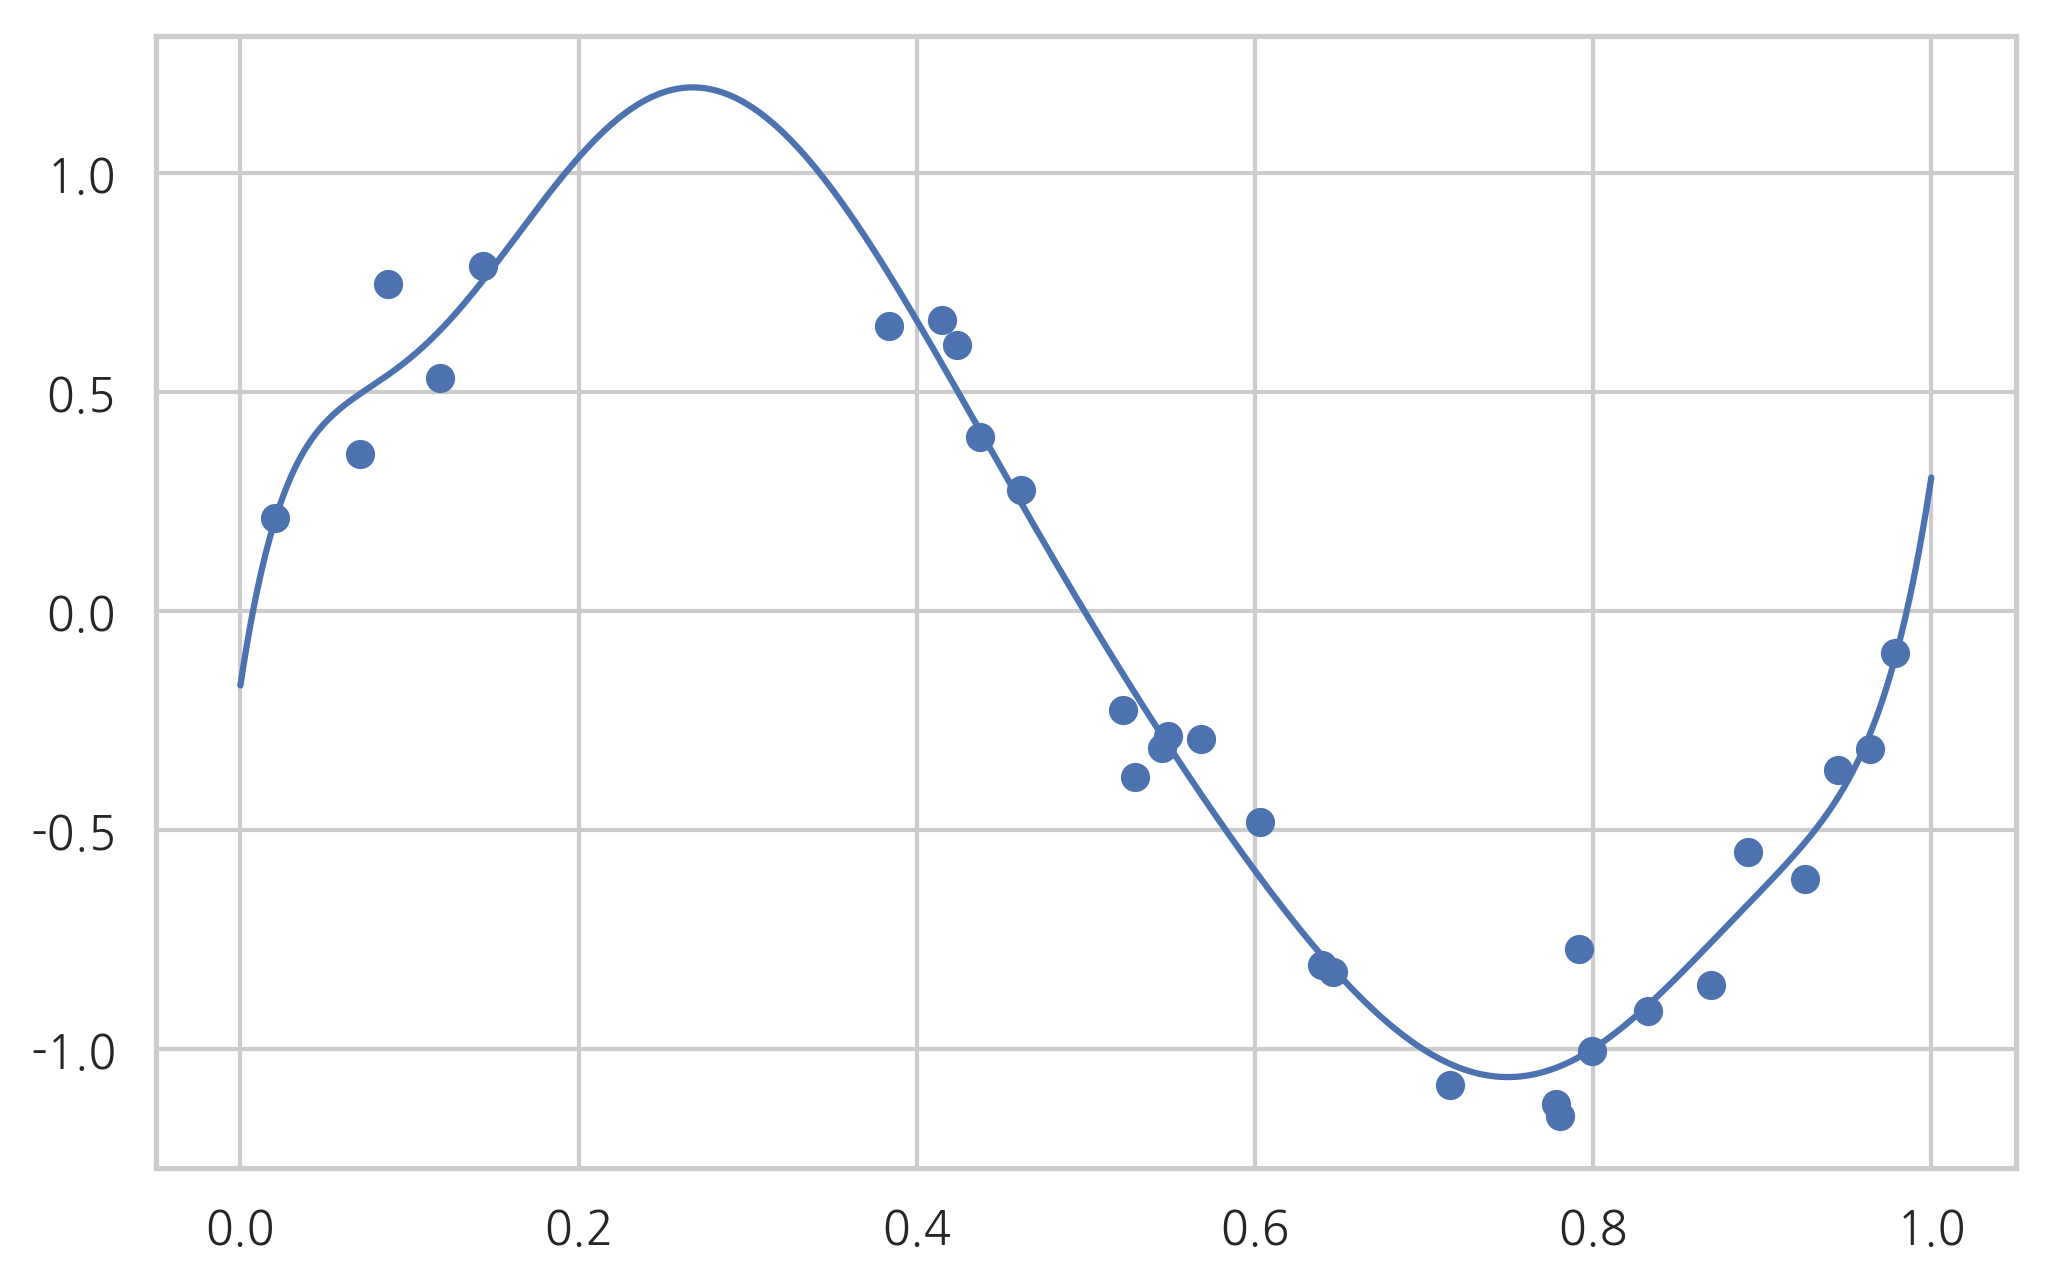

In [3]:
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()


plot_statsmodels(result1)

모수 `L1_wt`가 0 이면 순수 Ridge 모형이 된다.

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


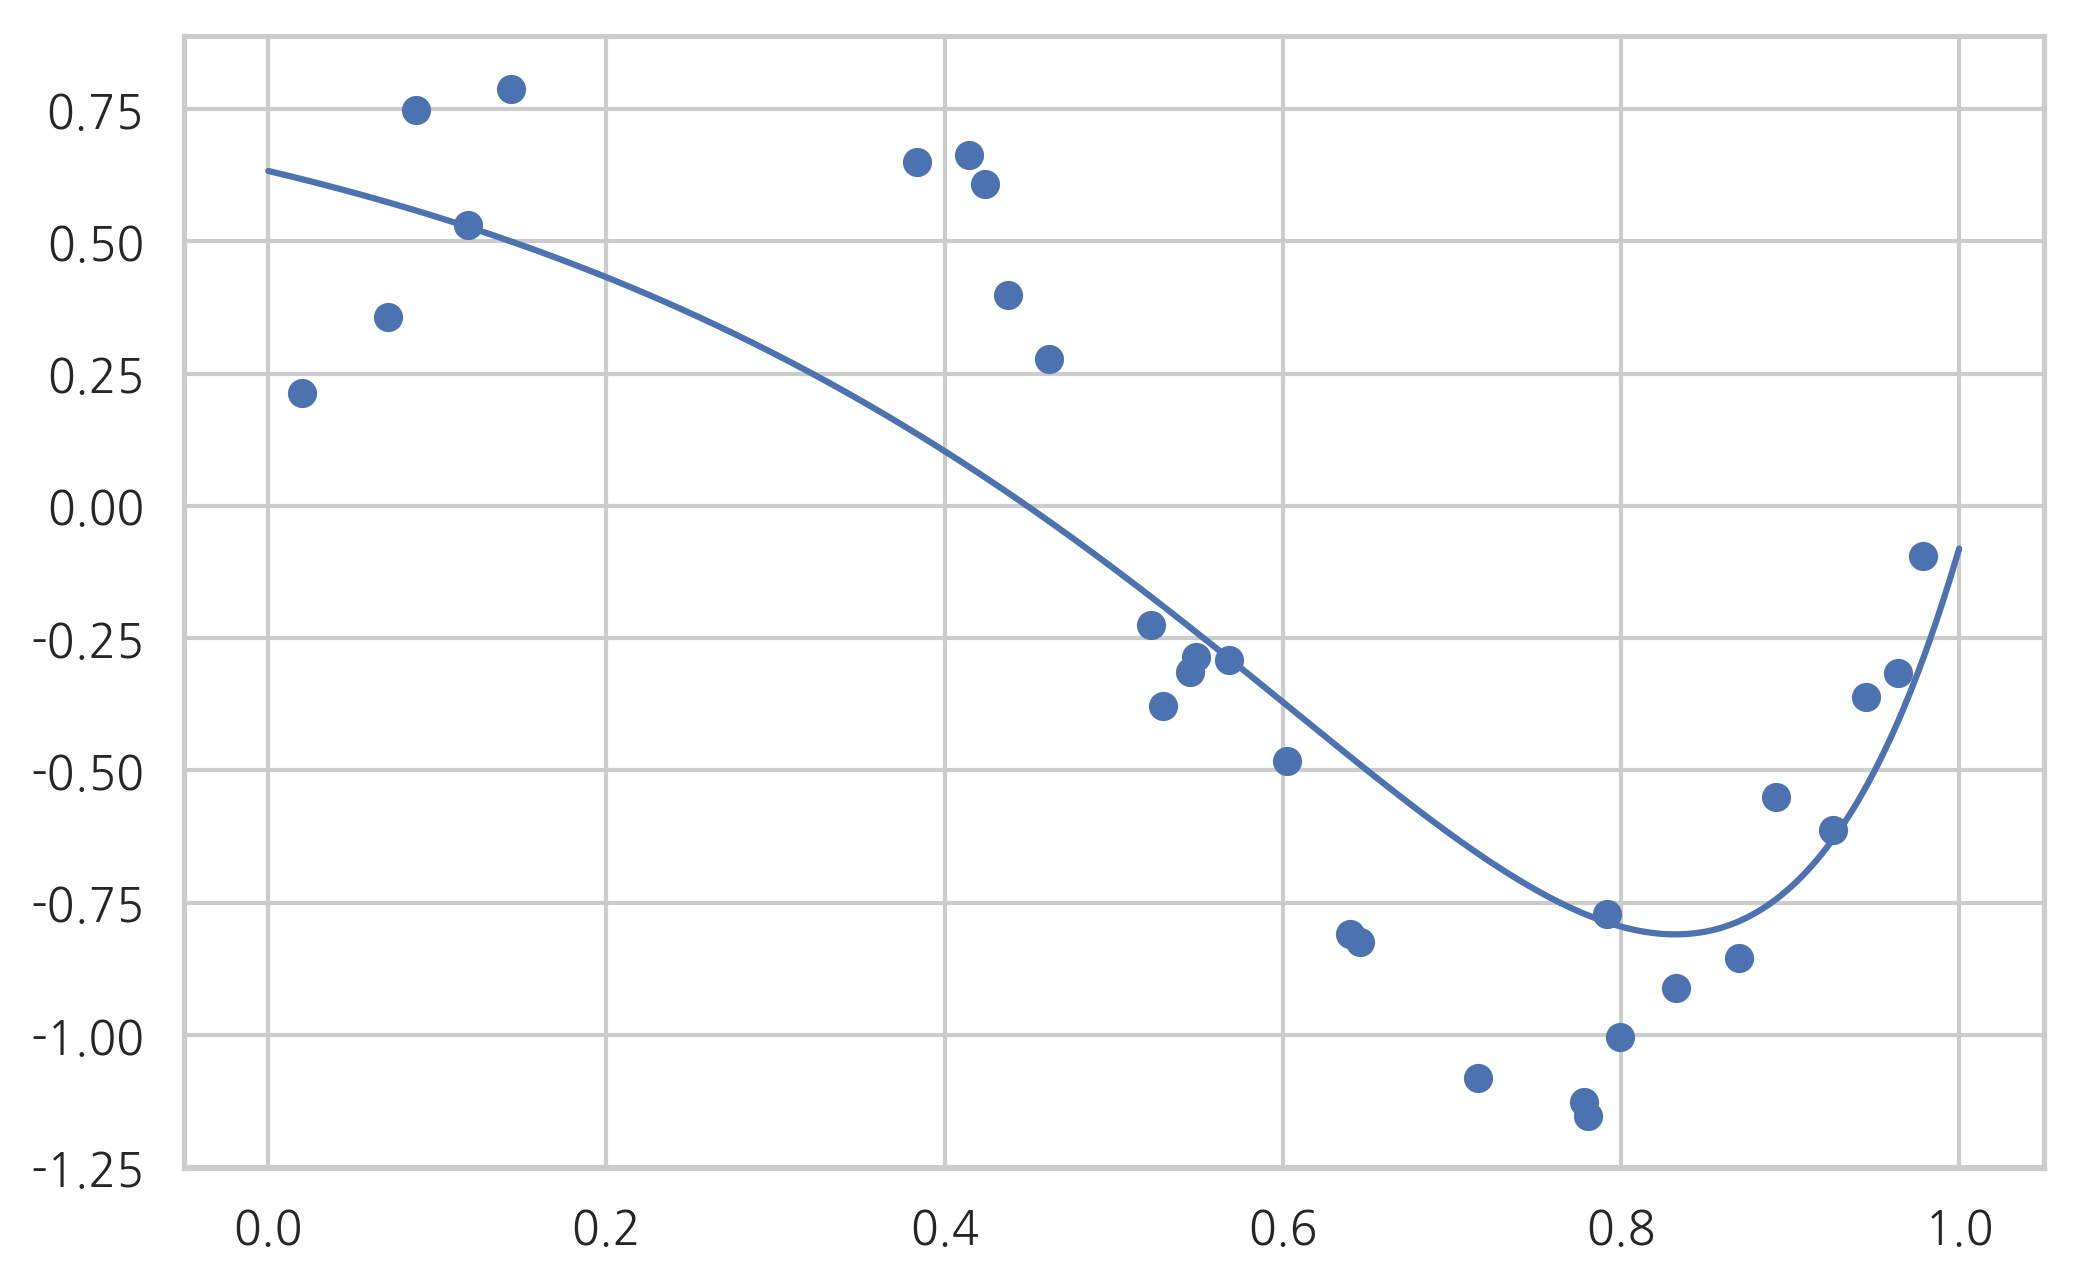

In [4]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2)

반대로 모수 `L1_wt`가 1 이면 순수 Lasso 모형이 된다.

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


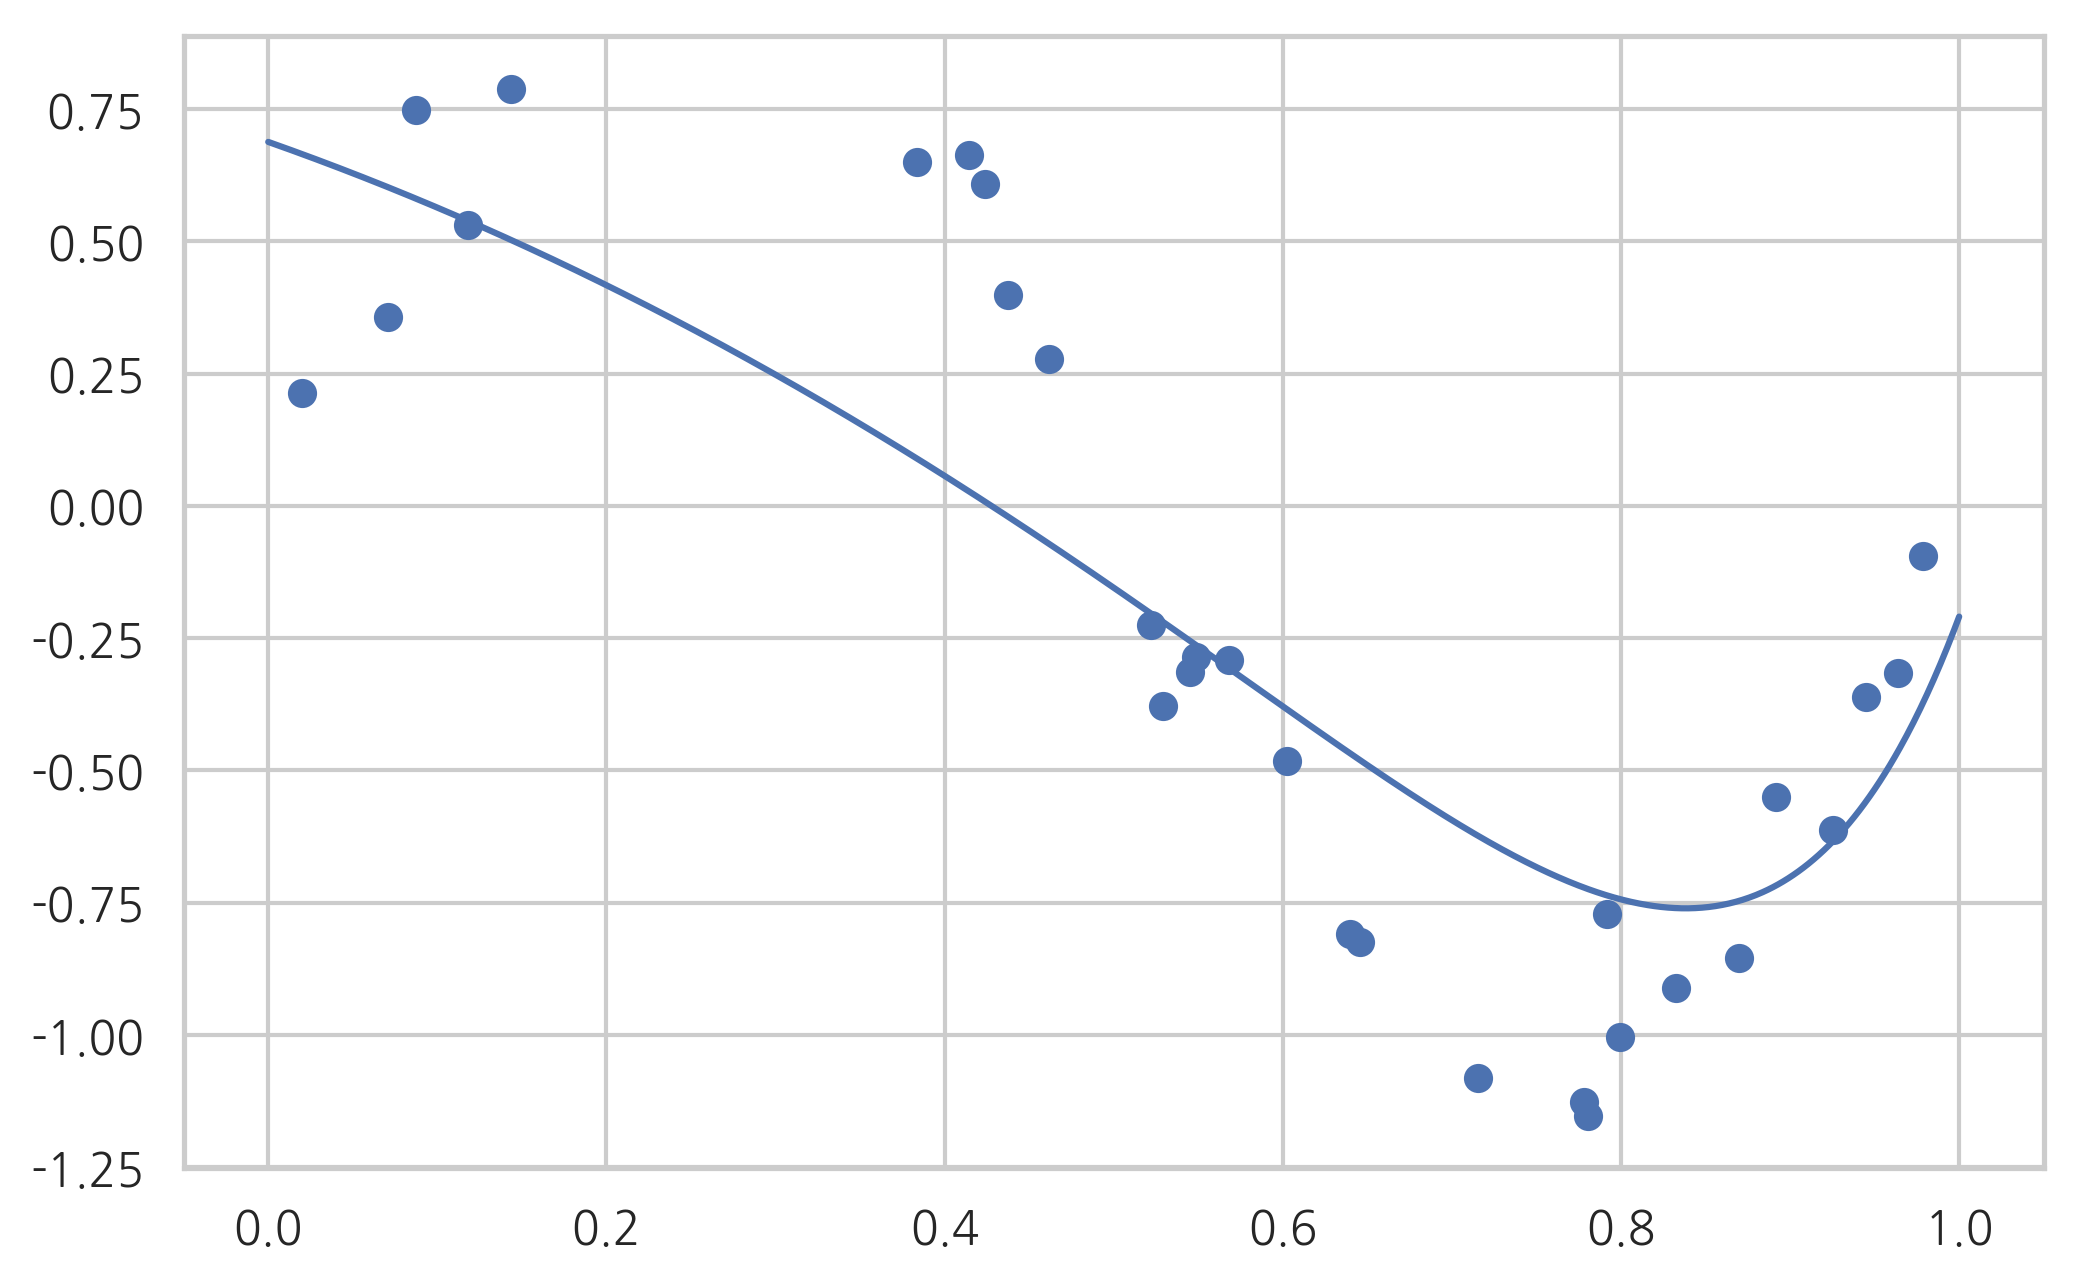

In [5]:
result3 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result3.params)
plot_statsmodels(result3)

모수 `L1_wt`가 0과 1 사이이면 Elastic Net 모형이다.

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


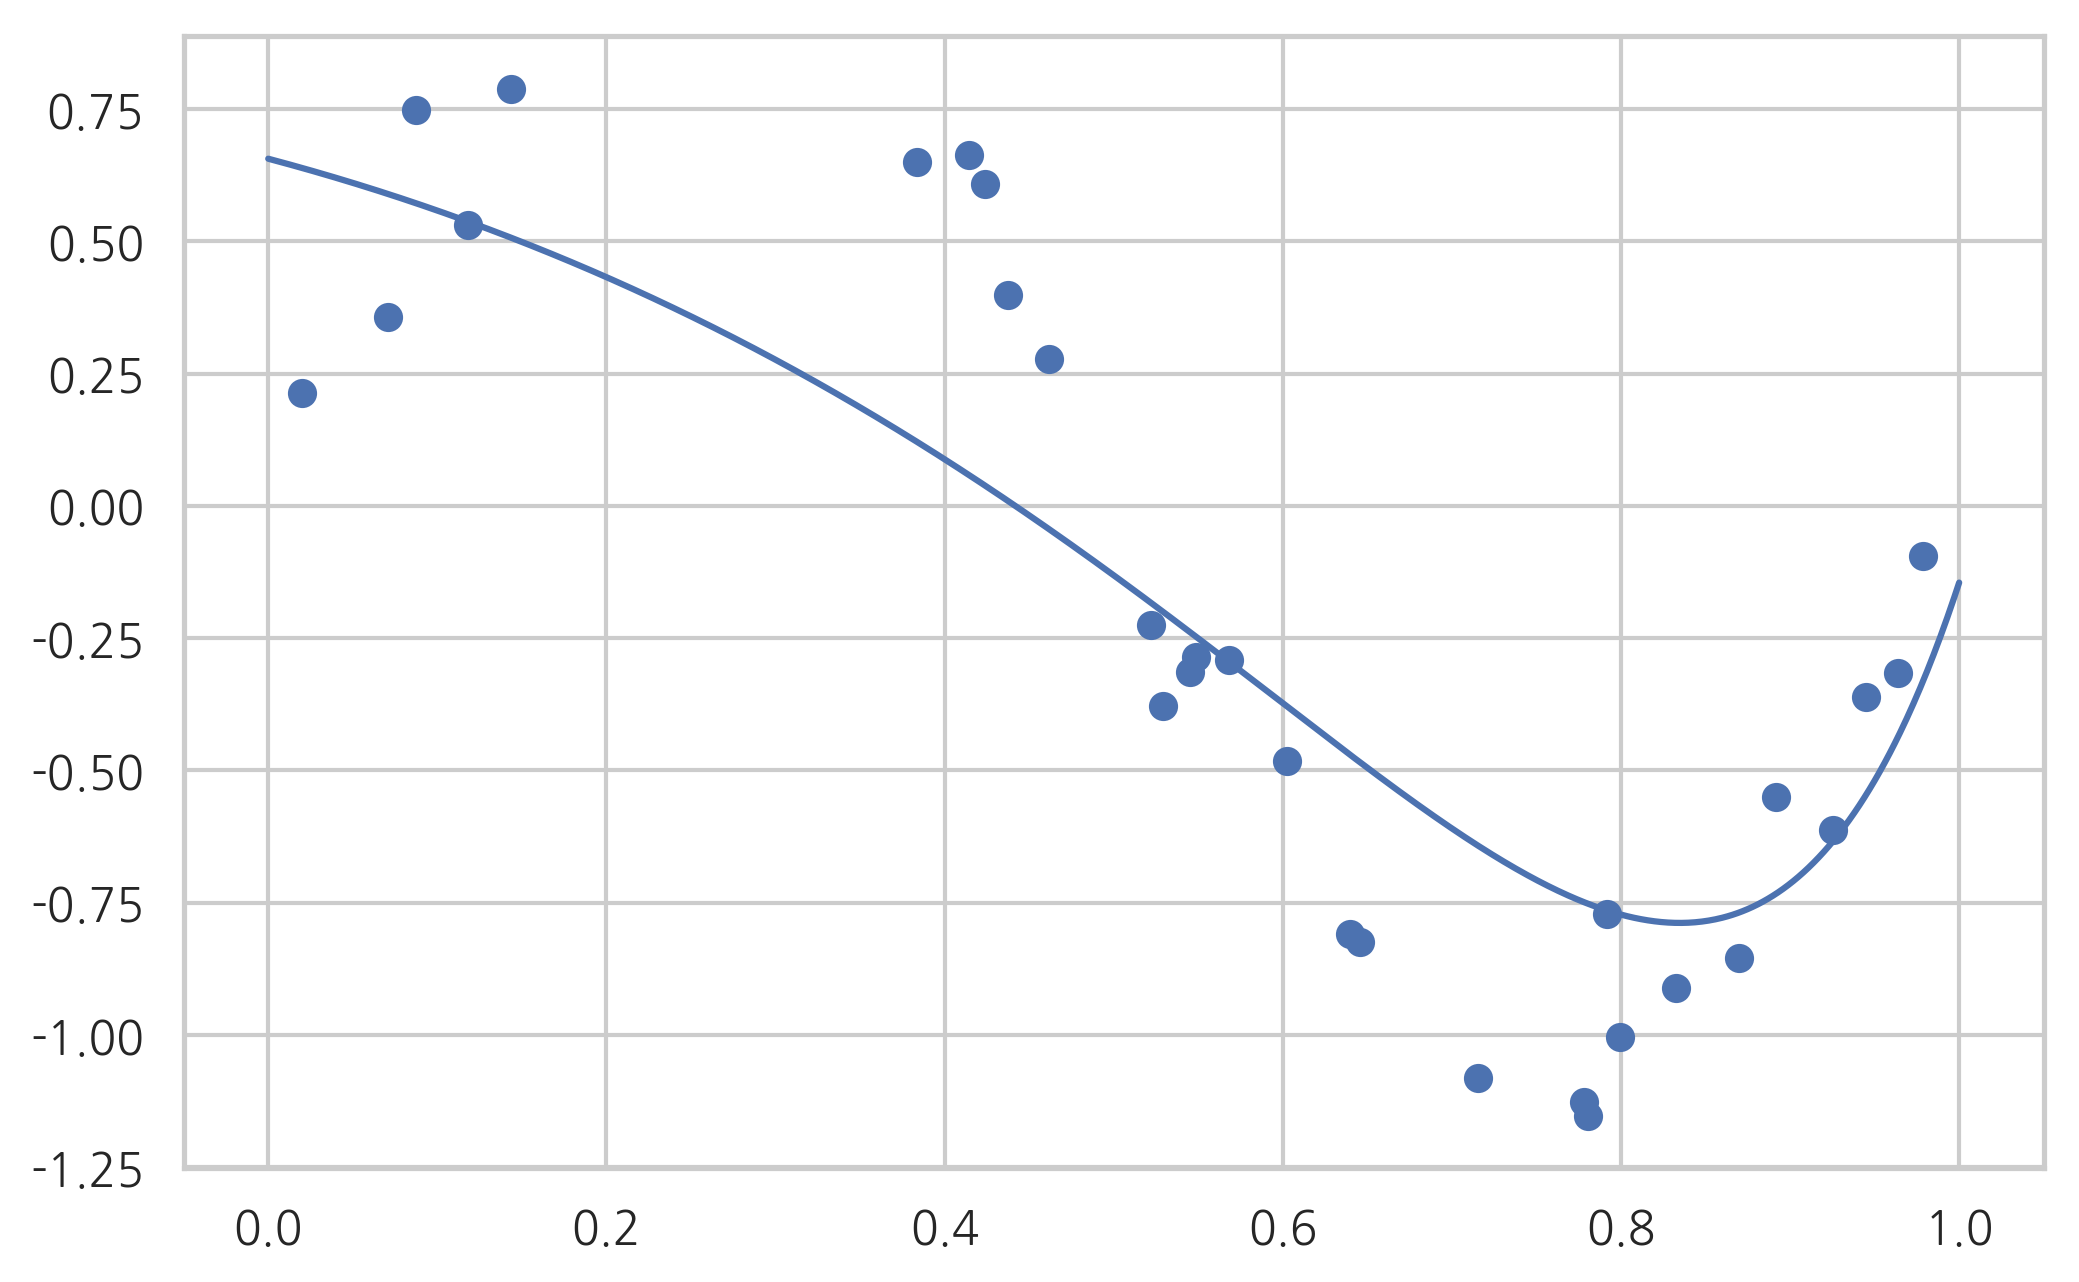

In [6]:
result4 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result4.params)
plot_statsmodels(result4)

### Scikit-Learn의 정규화 회귀모형

Scikit-Learn 패키지에서는 정규화 회귀모형을 위한 `Ridge`, `Lasso`, `ElasticNet` 이라는 별도의 클래스를 제공한다. 각 모형에 대한 최적화 목적 함수는 다음과 같다.

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

$$
\text{RSS} + \text{alpha} \sum w_i^2
$$

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

$$
0.5 \times \text{RSS}/N + \text{alpha} \sum |w_i|
$$

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

$$
0.5 \times \text{RSS}/N + 0.5 \times \text{alpha} \times \big(0.5 \times  (1-\text{l1_ratio})\sum w_i^2 + \text{l1_ratio} \sum |w_i| \big)
$$


In [7]:
def plot_sklearn(model):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show()

[ 0.00000000e+00  2.57357731e+01 -4.28141684e+02  3.86672312e+03
 -1.83409397e+04  4.93260726e+04 -7.88847431e+04  7.45386452e+04
 -3.84531322e+04  8.35025499e+03]


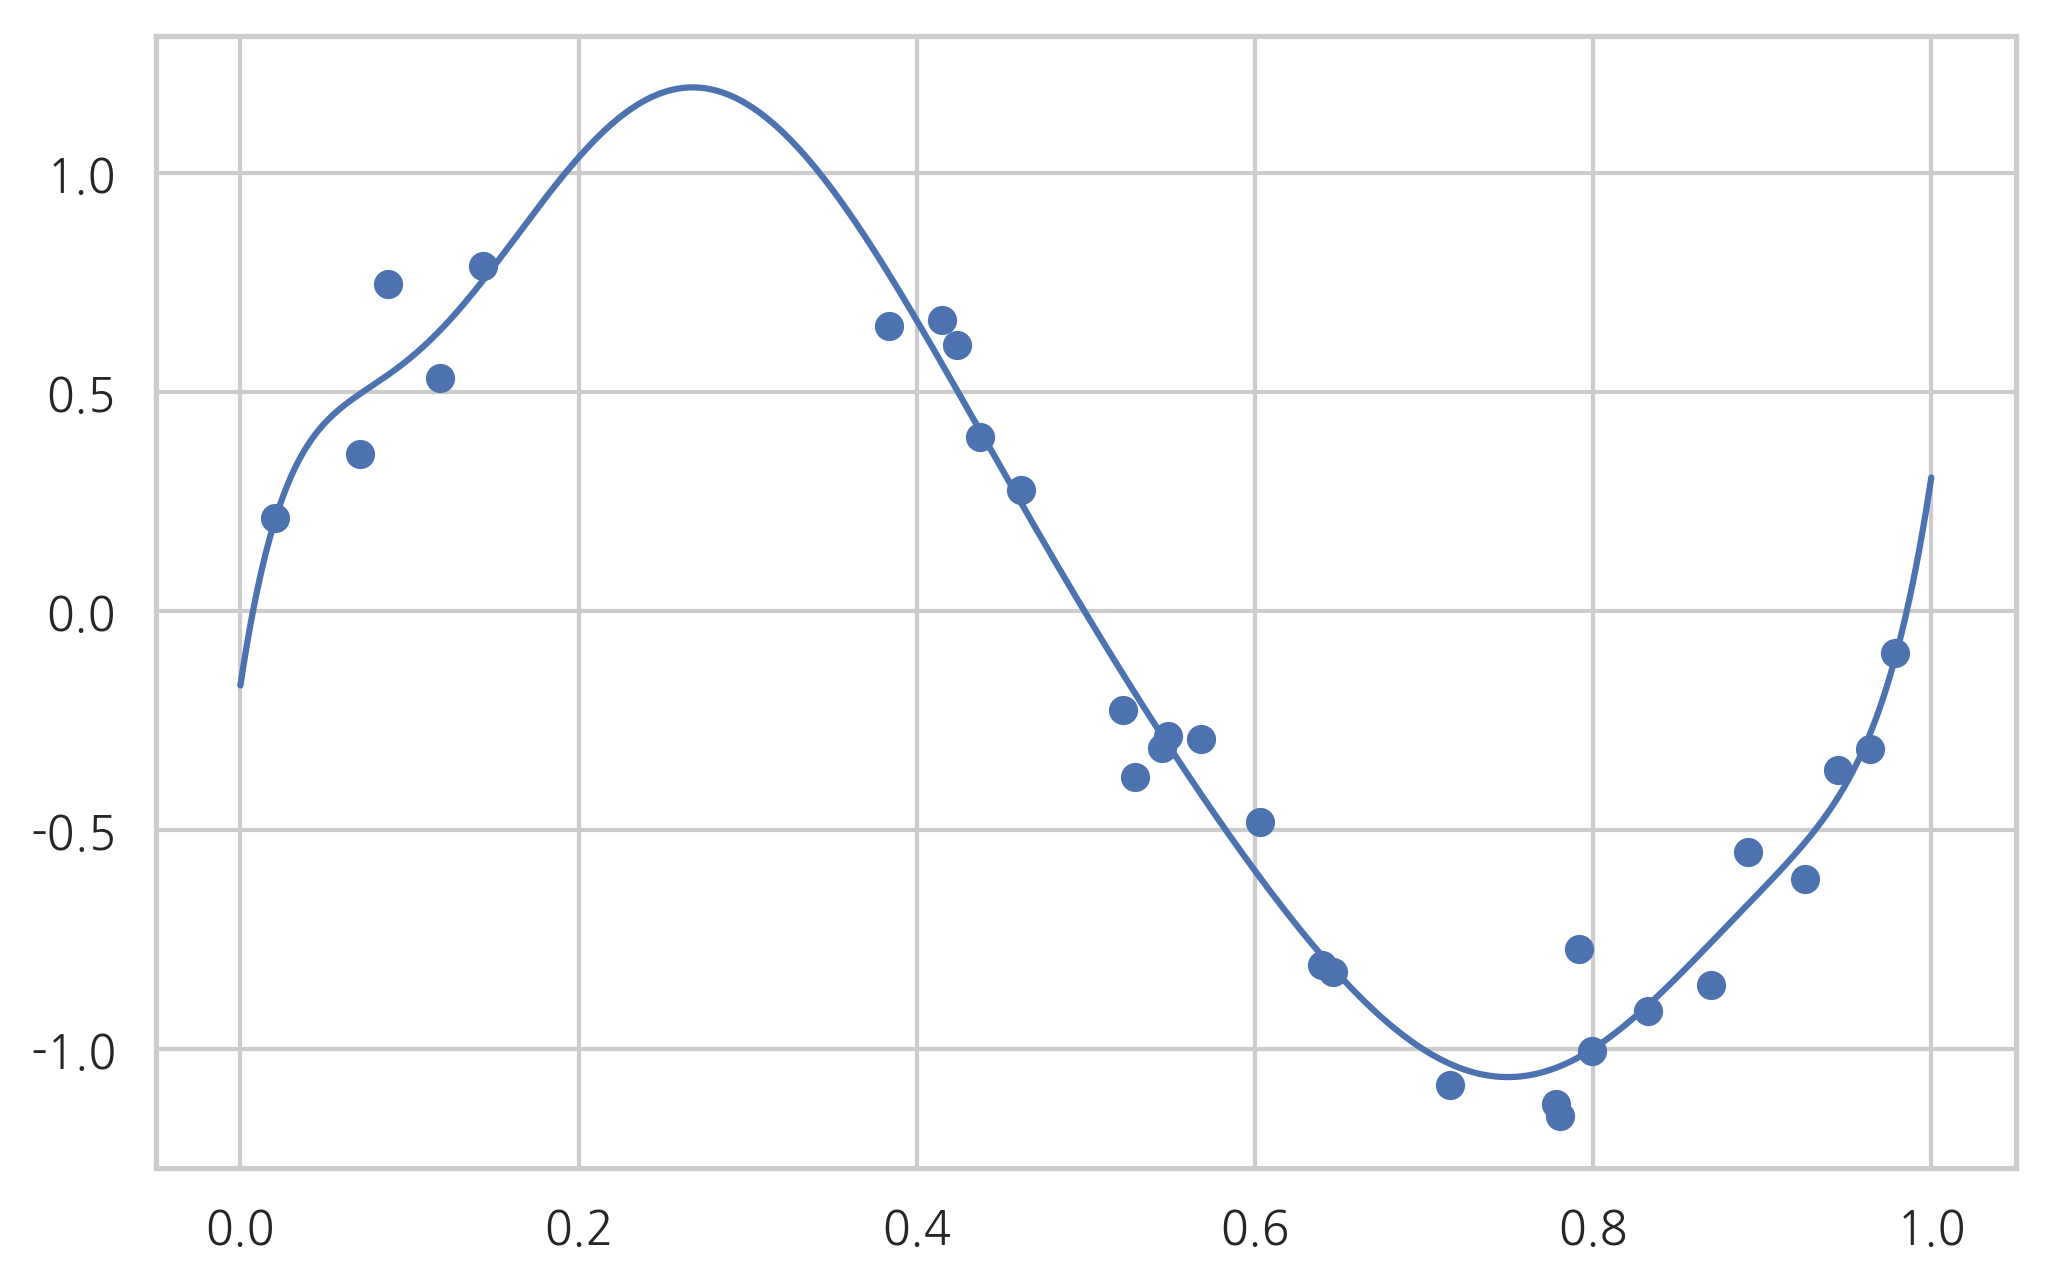

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


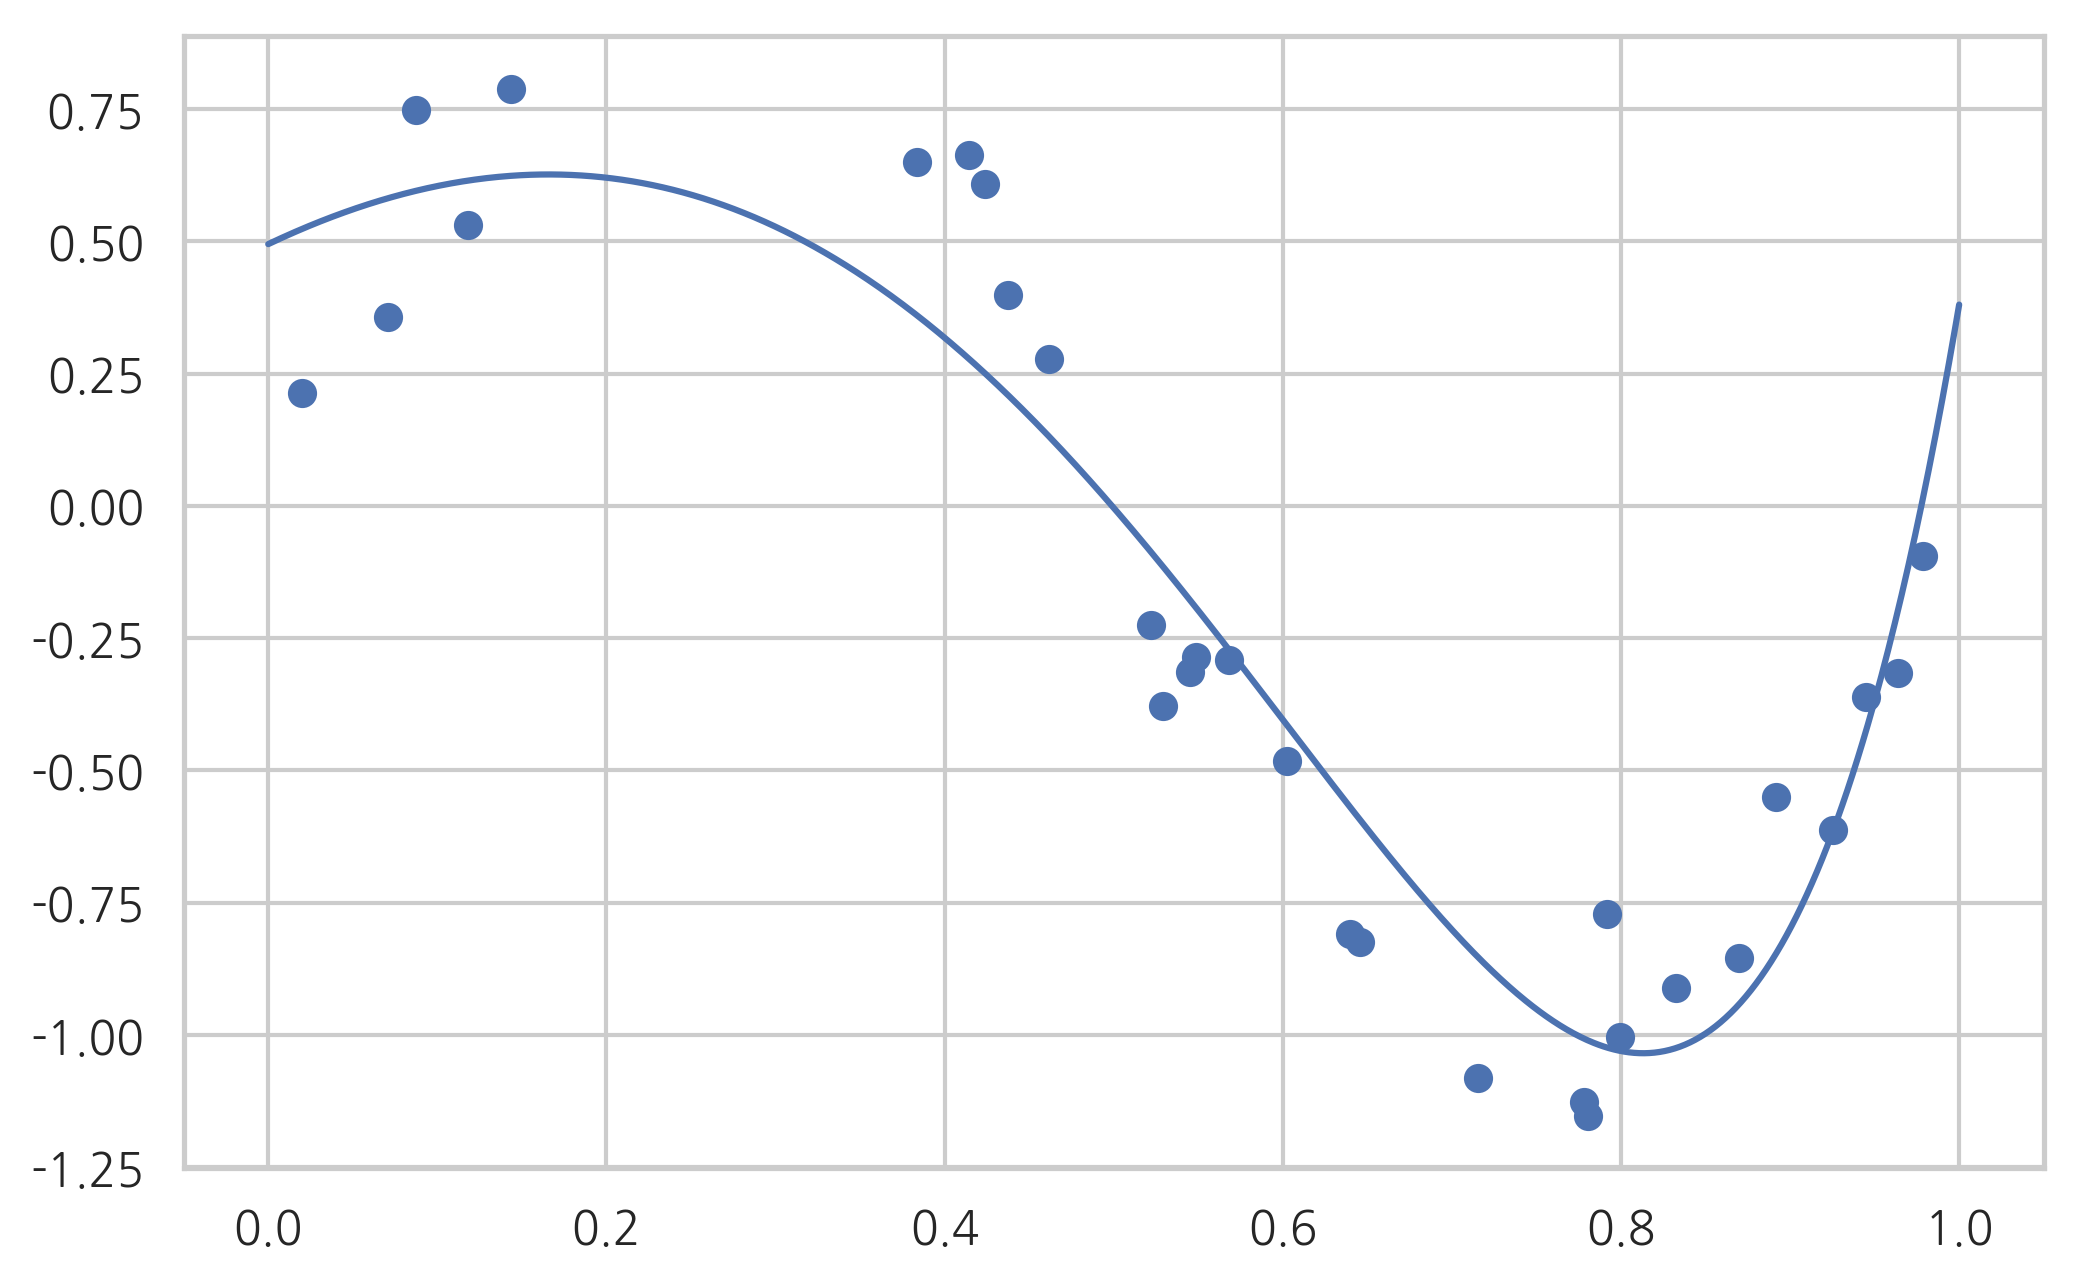

In [9]:
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


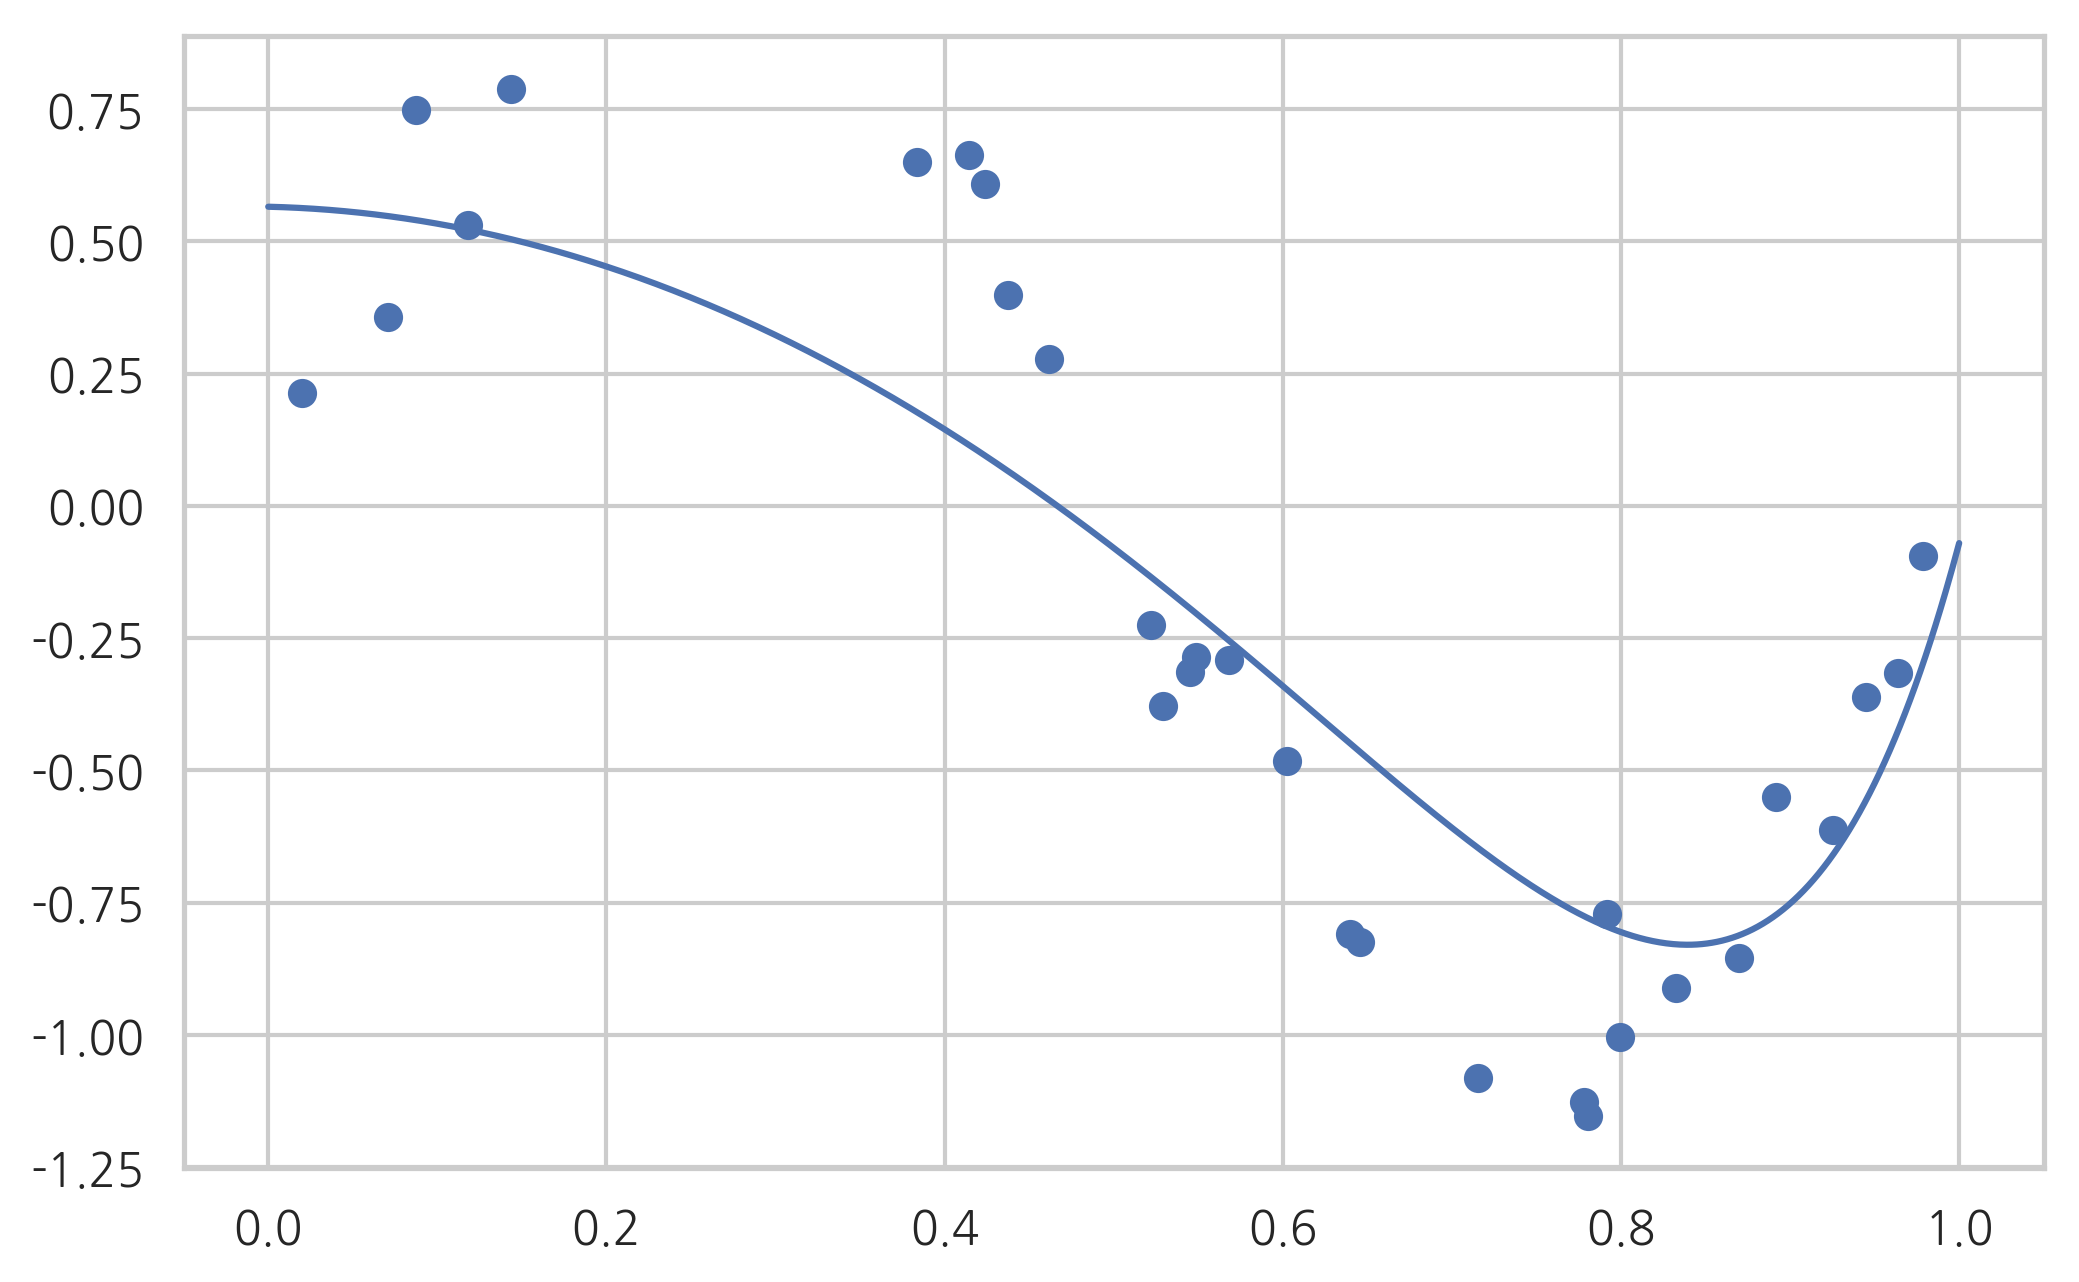

In [10]:
model = make_pipeline(poly, Lasso(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


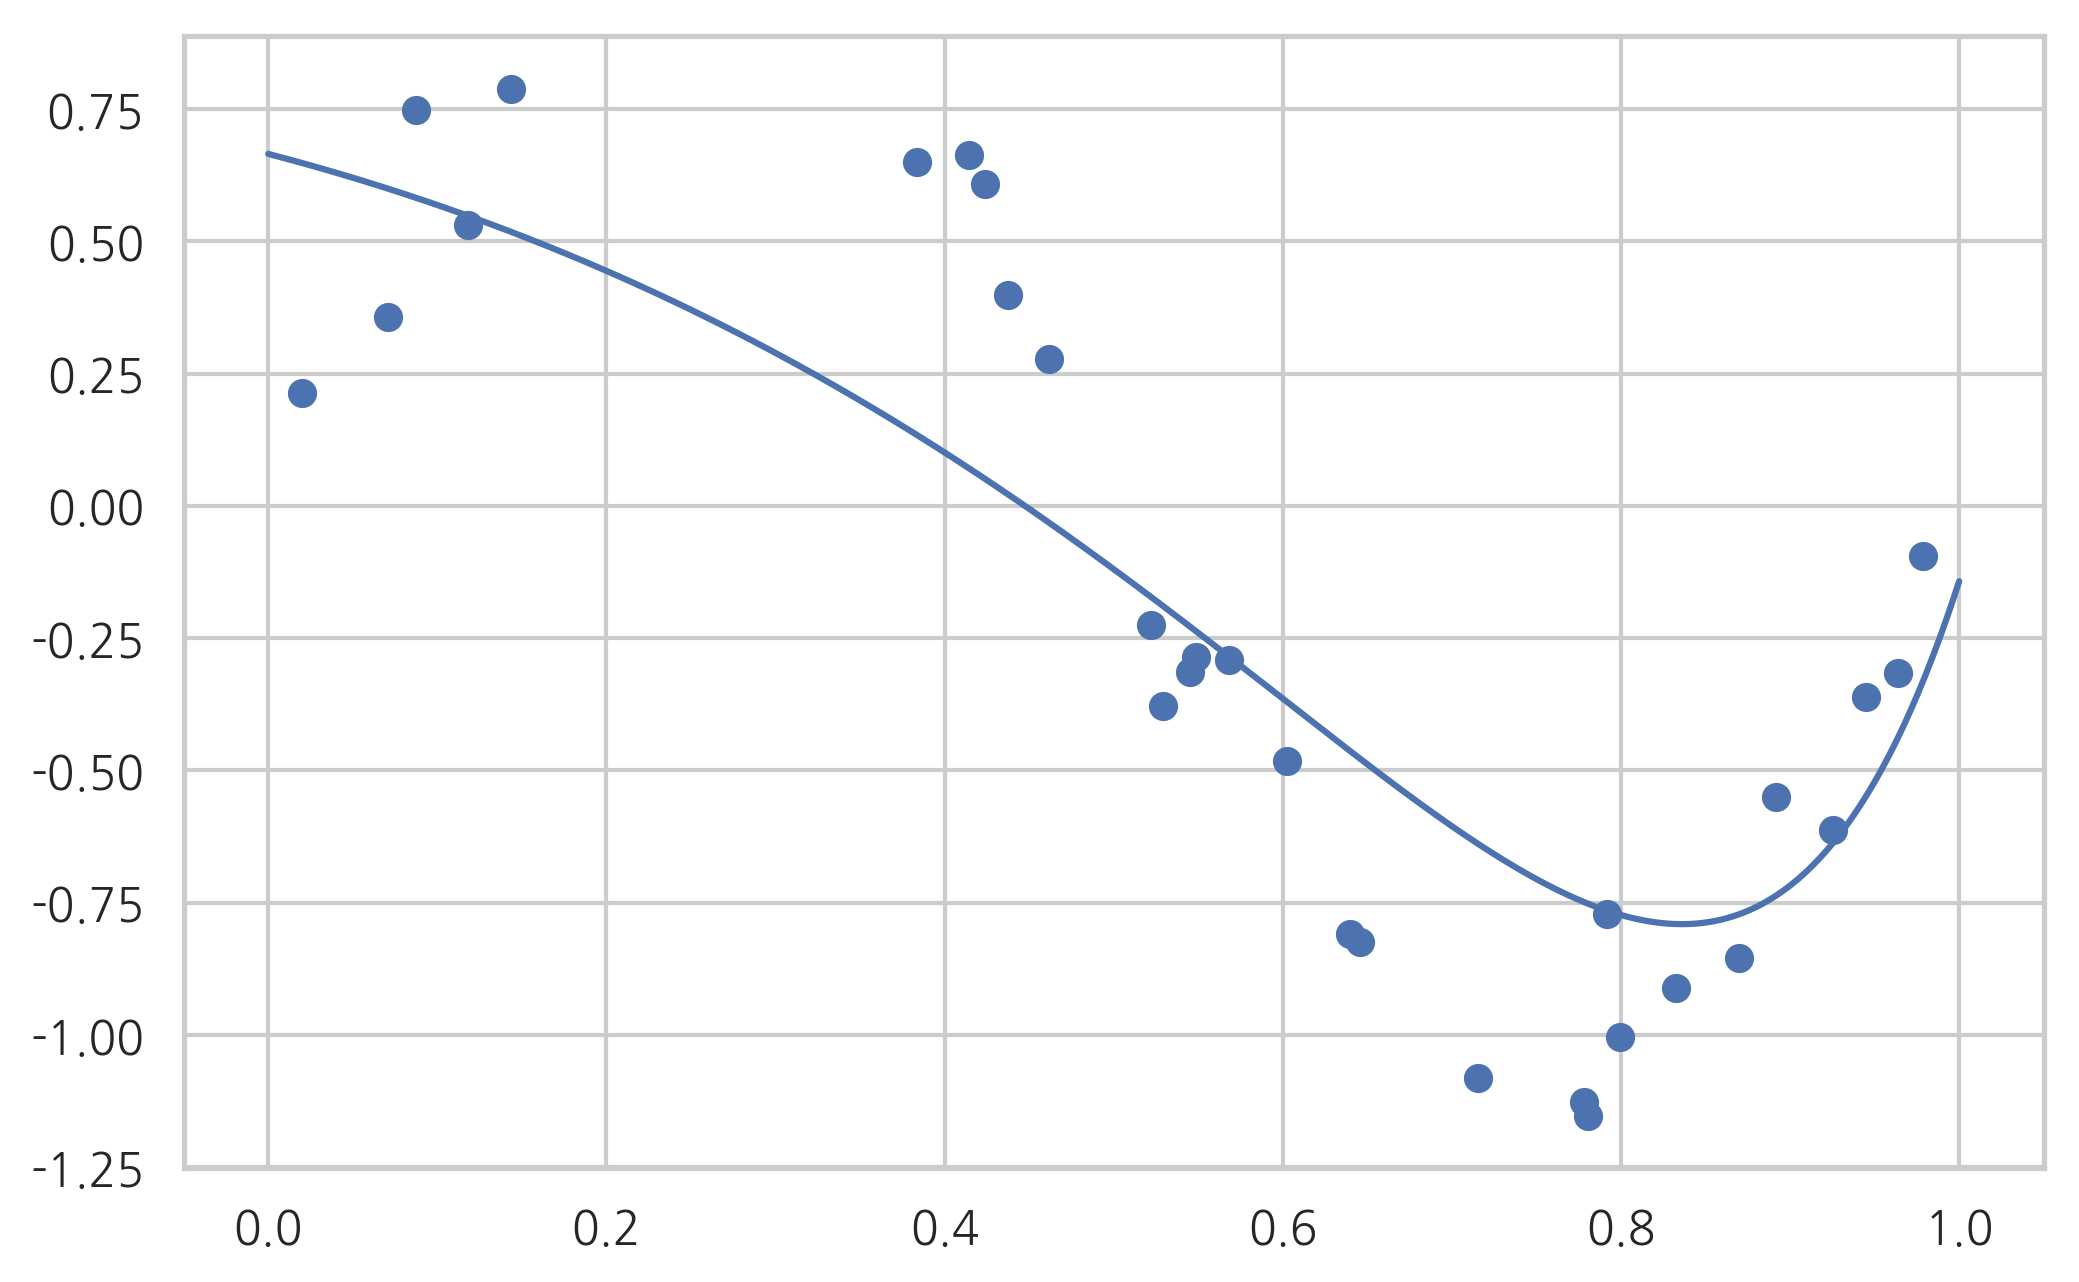

In [11]:
model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

### 정규화 모형의 장점

정규화 모형은 회귀 분석에 사용된 데이터가 달라져도 계수가 크게 달라지지 않도록 한다.

### 정규화의 의미

정규화 제한조건은 정규화가 없는 최적화 문제에 부등식 제한조건을 추가한 것과 마찬가지이다. 즉 릿지 회귀모형은 

$$
w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2  \right)
$$
이라는 최적화 문제에 다음과 같은 부등식 제한조건을 추가한 것과 같다.

$$
\sum_{j=1}^M w_j^2 \leq C
$$

라그랑지 방법을 사용하면 앞의 부등식 제한조건이 있는 최적화 문제는 다음과 같은 부등식 제한조건이 없는 최적화 문제가 된다.

$$
\begin{eqnarray}
w 
&=& \text{arg}\min_w \left( \sum_{i=1}^N e_i^2  + \lambda \left( \sum_{j=1}^M w_j^2 - C \right) \right) \\
&=& \text{arg}\min_w \left( \sum_{i=1}^N e_i^2  + \lambda \sum_{j=1}^M w_j^2 - \lambda C \right) \\
\end{eqnarray}
$$

### Ridge 모형과 Lasso 모형의 차이

Ridge 모형은 가중치 계수를 한꺼번에 축소시키는데 반해 Lasso 모형은 일부 가중치 계수가 먼저 0으로 수렴하는 특성이 있다.

<img src="https://datascienceschool.net/upfiles/ee062ff7ca28419db5c6bab5e8fa50fe.png" style="width: 100%;">

그림 31.1 Lasso 모형(왼쪽), Ridge 모형(오른쪽)

In [12]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [13]:
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.01,0.1,1.0,10.0
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


In [14]:
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.01,0.1,1.0,10.0
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


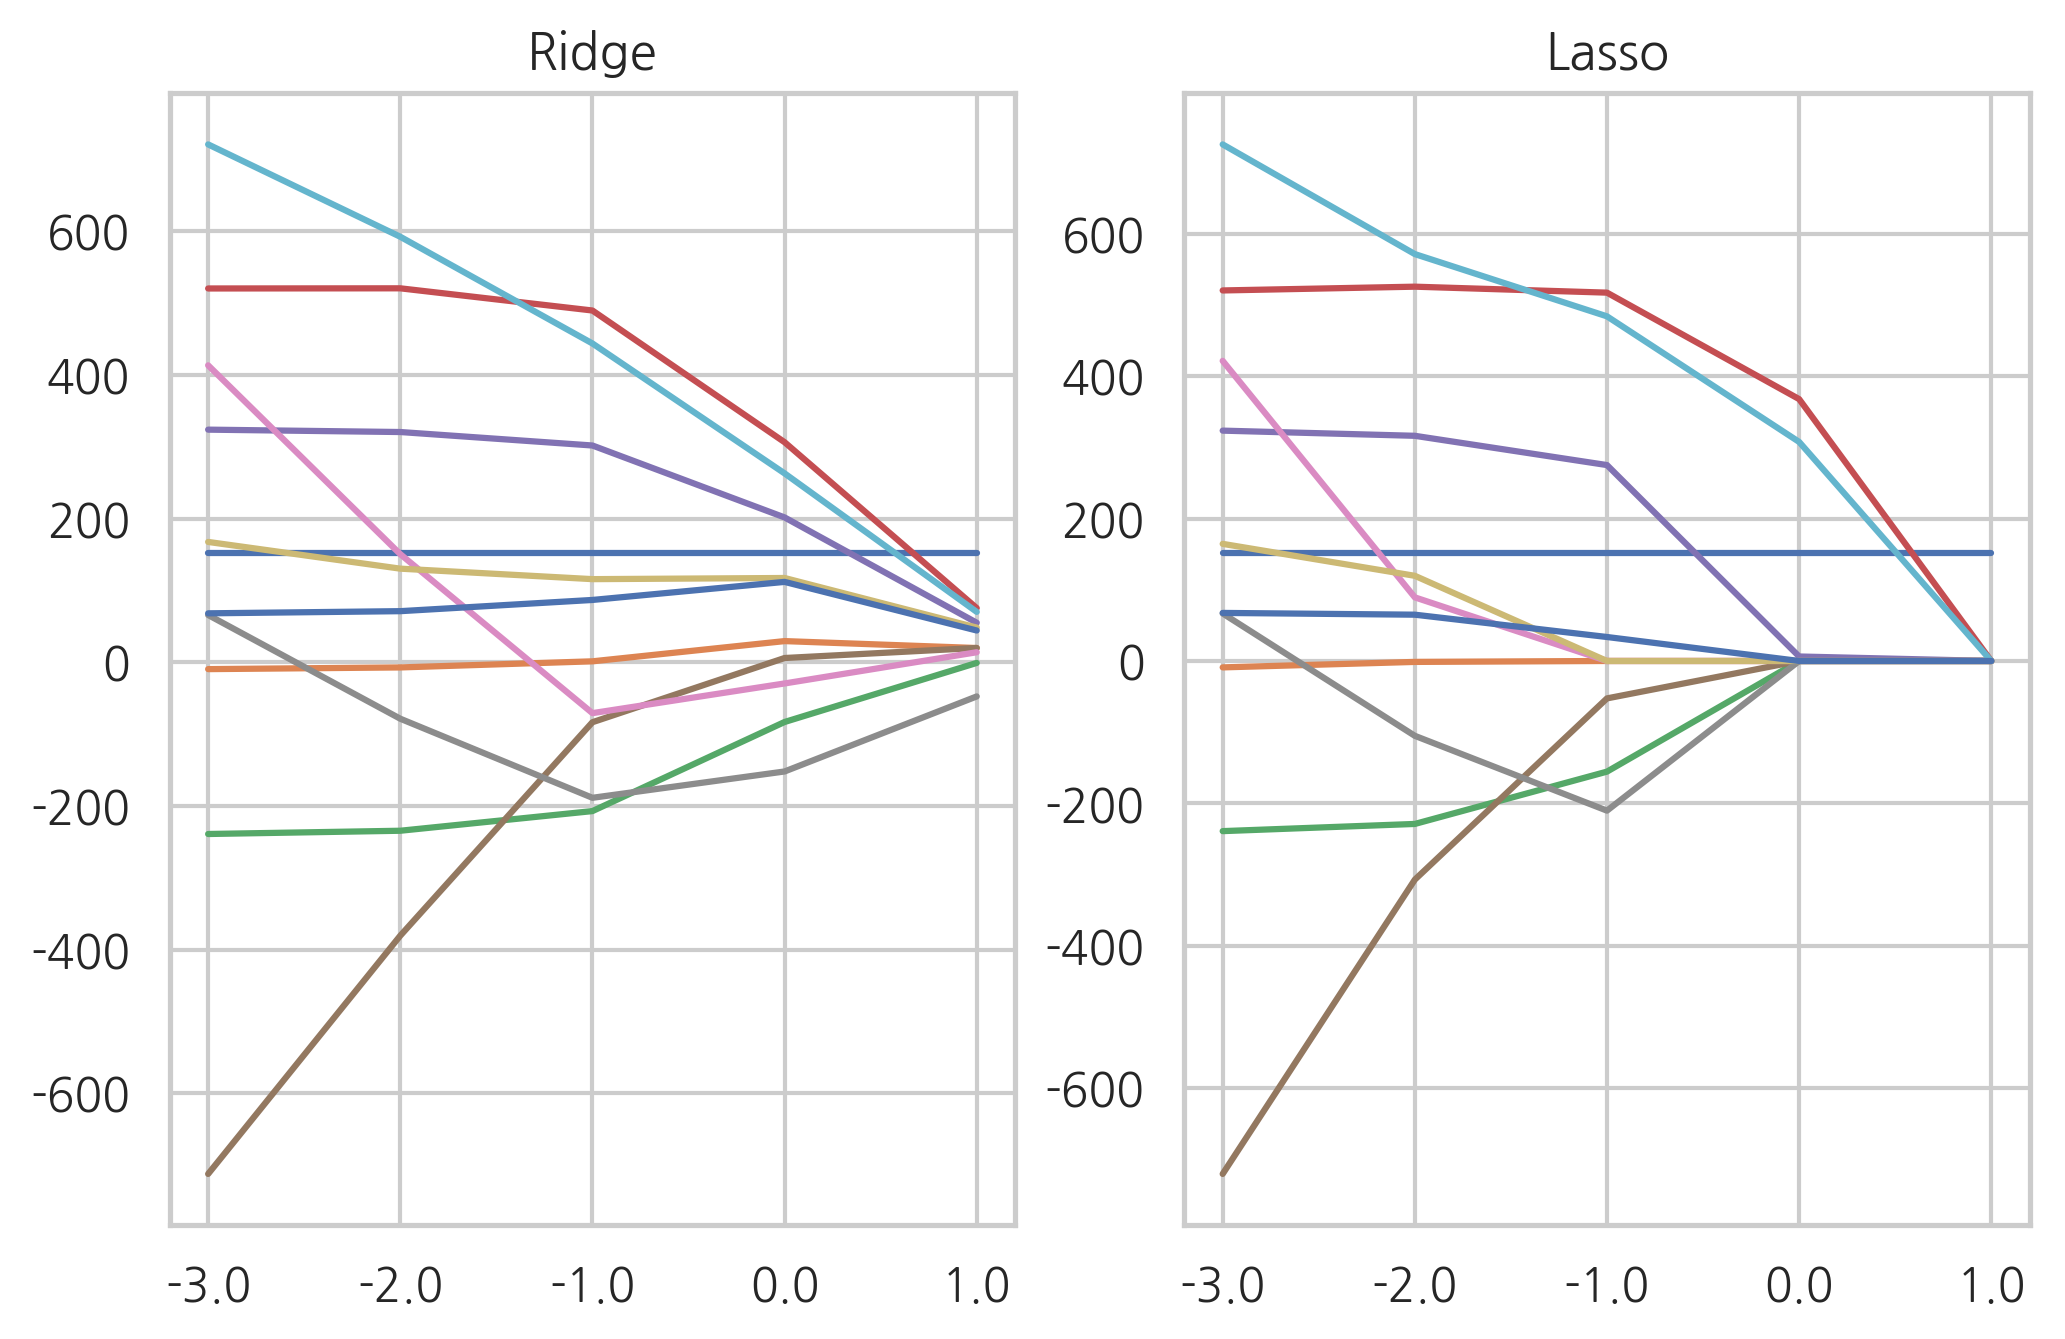

In [15]:
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

plt.show()

### 최적 정규화

정규화에 사용되는 하이퍼 모수(hyper parameter) 등을 바꾸면 모형의 검증 성능이 달라진다. 따라서 최적의 성능을 가져올 수 있는 정규화 하이퍼 모수를 선택하는 과정이 필요하다. 이러한 과정을 최적 정규화(optimal regularization)라고 한다.

보스턴 집값 데이터에 대해 라쏘 정규화(Lasso regularization)를 하는 경우를 예로 들어보자. 우선 scikit-learn에서 제공하는 `Lasso` 클래스를 사용하여 정규화를 한다. 정규화 가중치 $\alpha$가 달라지면 학습용 데이터를 사용한 성능과 검증용 데이터를 사용한 성능이 달라진다.

* 학습용 데이터를 사용한 성능은 정규화 가중치 $\alpha$가 작으면 작을 수록 좋아진다.(과최적화)
* 검증용 데이터를 사용한 성능은 정규화 가중치 $\alpha$가 특정한 범위에 있을 때 가장 좋아진다.

실제로 정규화 가중치 $\alpha$를 $10^{-3}$부터 $10^{-0.5}$까지 변화시켜가면서 두 성능을 측정해 보자. 

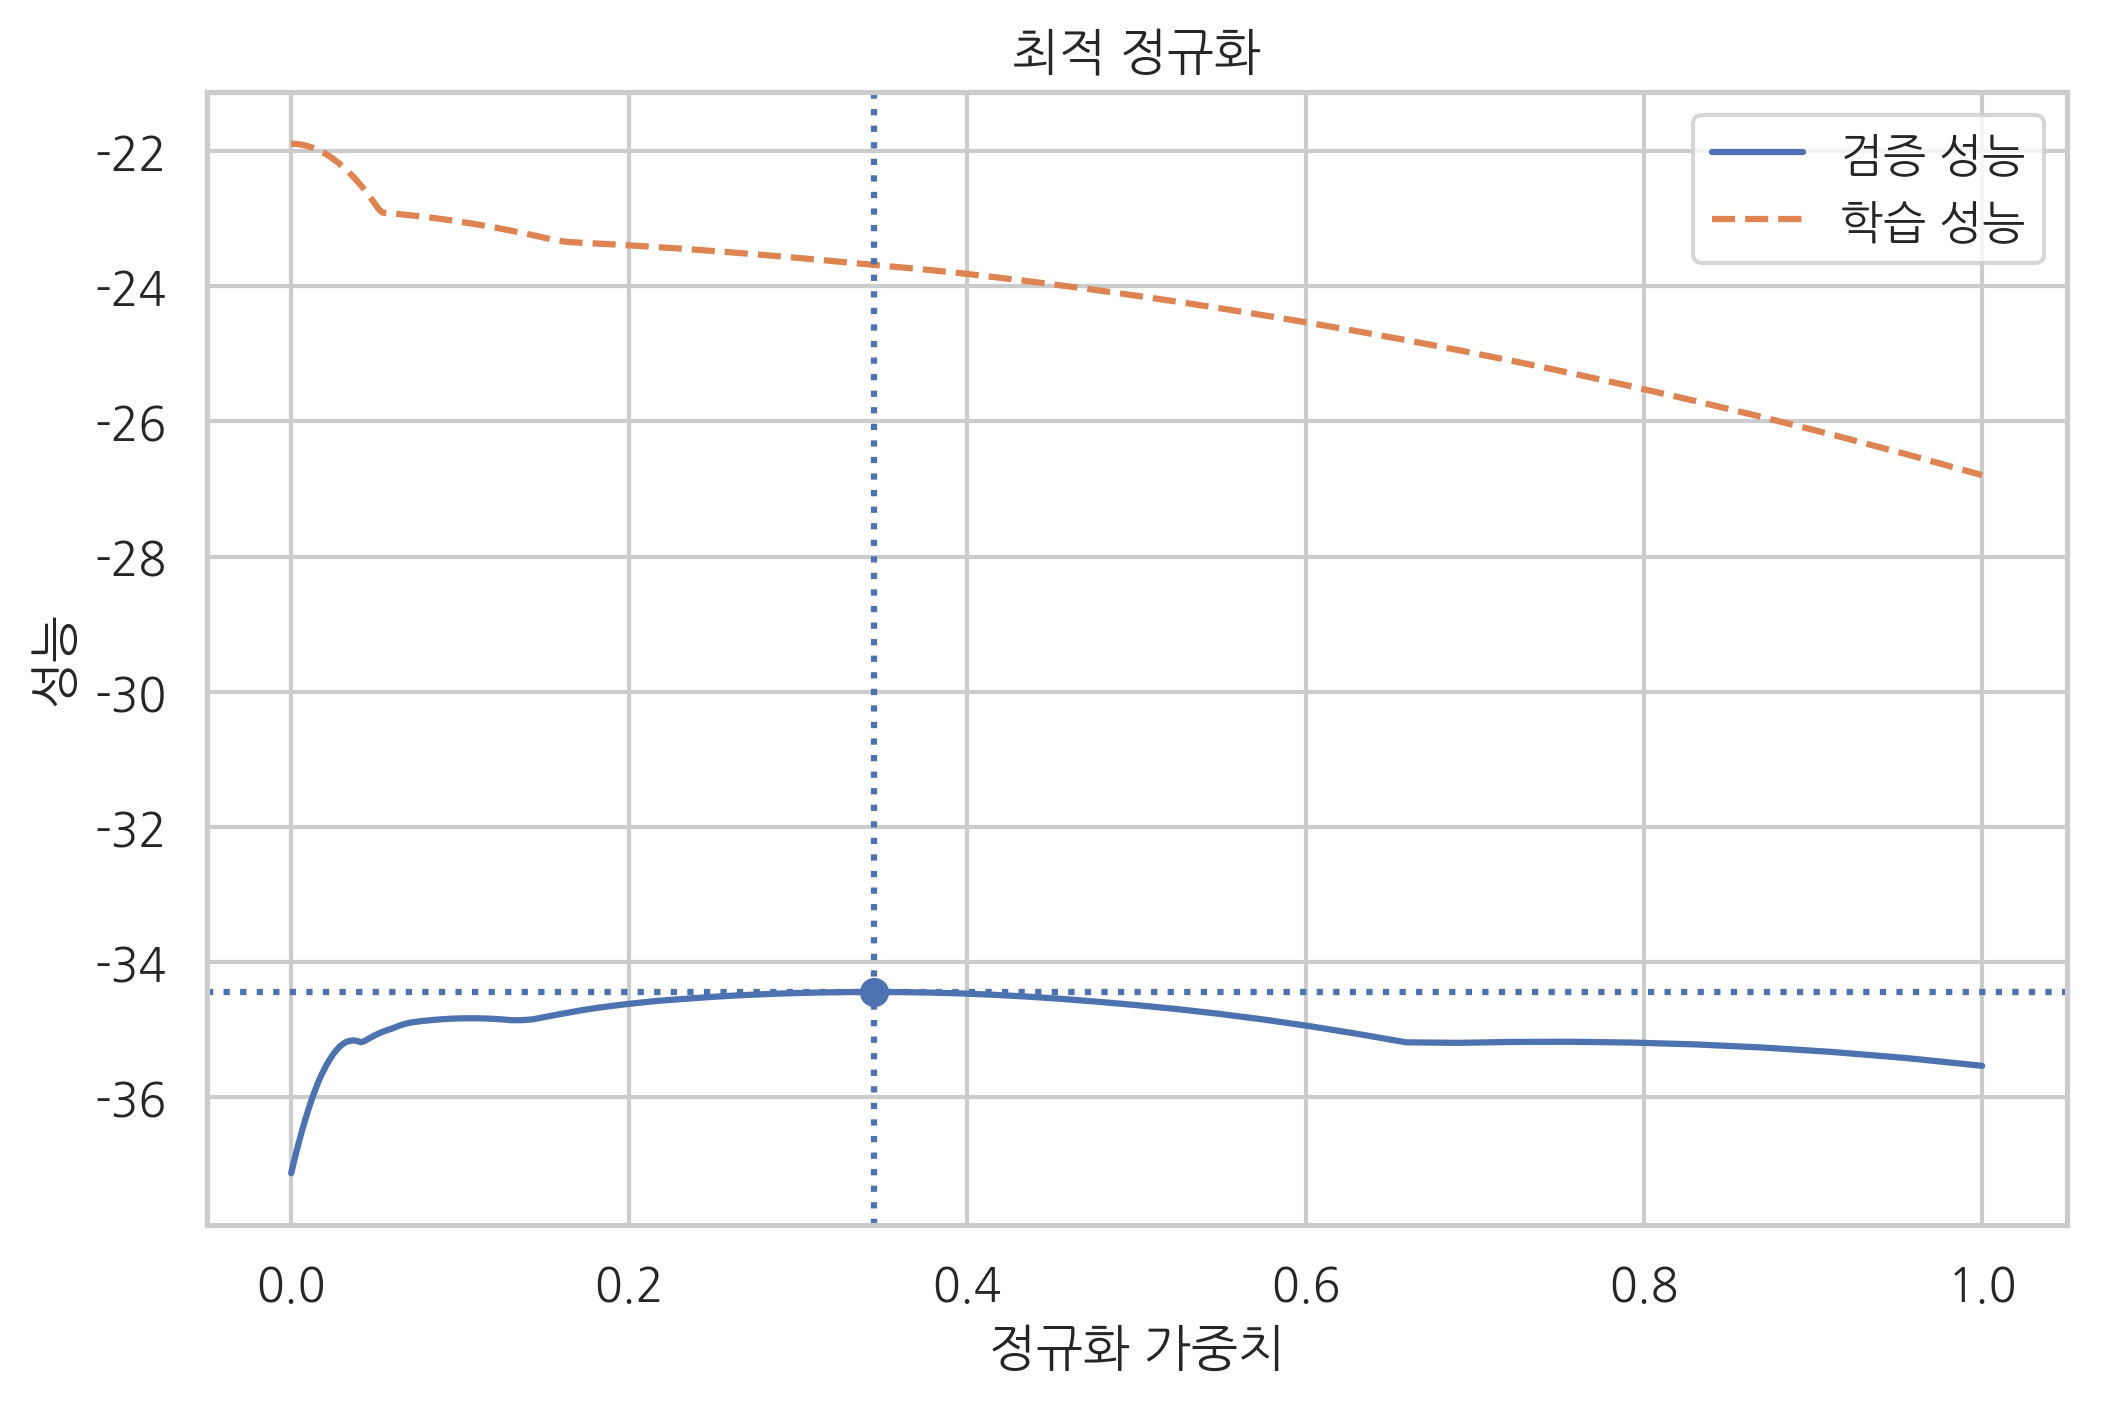

In [16]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

boston = load_boston()
X = boston.data
y = boston.target

alphas = np.logspace(-4, 0, 200)

train_scores = []
test_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(y, model.fit(X, y).predict(X))
    test_score = np.mean(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, "-", label="검증 성능")
plt.plot(alphas, train_scores, "--", label="학습 성능")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("최적 정규화")
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.show()

### 검증성능 곡선

위와 같이 특정한 하나의 하이퍼 모수를 변화시켰을 때 학습 성능과 검증 성능을 변화를 나타낸 곡선을 검증성능 곡선(validation curve)이라고 한다.
scikit-learn 패키지의 model_selection 서브패키지에서 제공하는 `validation_curve` 함수를 사용하면 검증성능 곡선을 보다 쉽게 그릴 수 있다. 

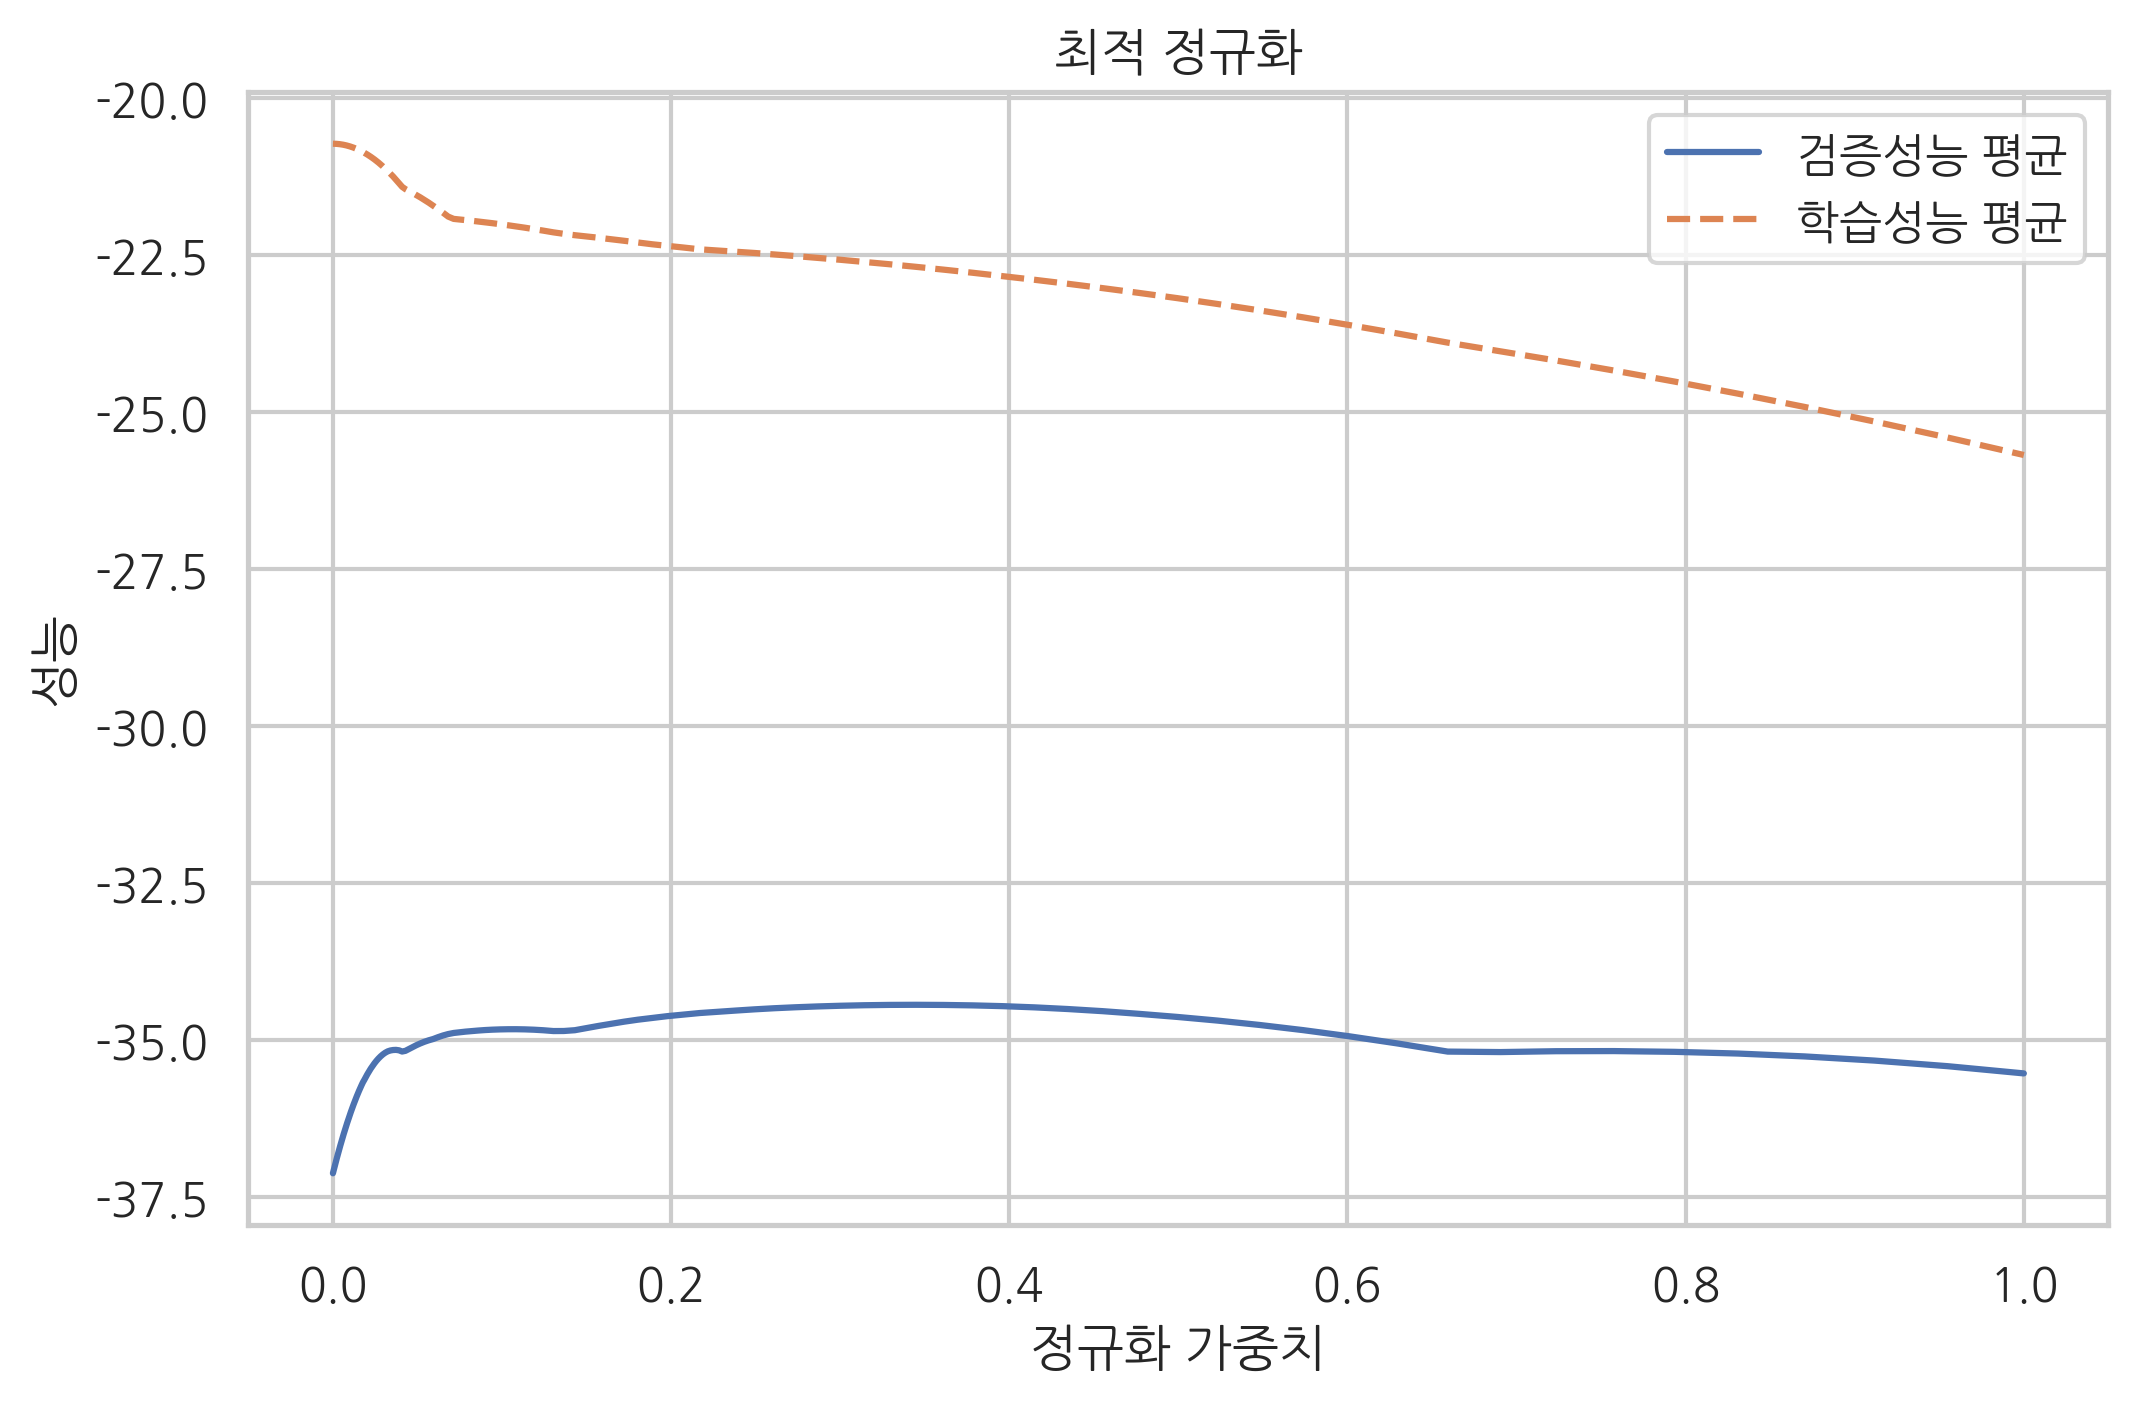

In [17]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    Lasso(), X, y, "alpha", alphas, cv=5,
    scoring="neg_mean_squared_error")

plt.plot(alphas, test_scores.mean(axis=1), "-", label="검증성능 평균")
plt.plot(alphas, train_scores.mean(axis=1), "--", label="학습성능 평균")
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.title("최적 정규화")
plt.show()

### 다항회귀의 차수 결정

다항회귀에서 차수가 감소하면 모형의 제약조건이 더 강화되므로 정규화 가중치가 커지는 것과 같다. 반대로 차수가 증가하면 모형의 제약조건이 감소하므로 정규화 가중치가 작아지는 것과 같다. 따라서 다항회귀에서 최적의 차수를 결정하는 문제는 최적 정규화에 해당한다.

다음 예제 코드는 파이프라인이 있는 모형에 대해 `validation_curve` 명령을 적용하는 방법을 보이고 있다. 파이프라인으로 만들어진 모형에서는 적용할 모형의 이름 문자열(이 예제에서는 `poly`)과 인수의 이름 문자열(이 예제에서는 `degree`)을 두 개의 밑줄(underscore)로 연결한다.

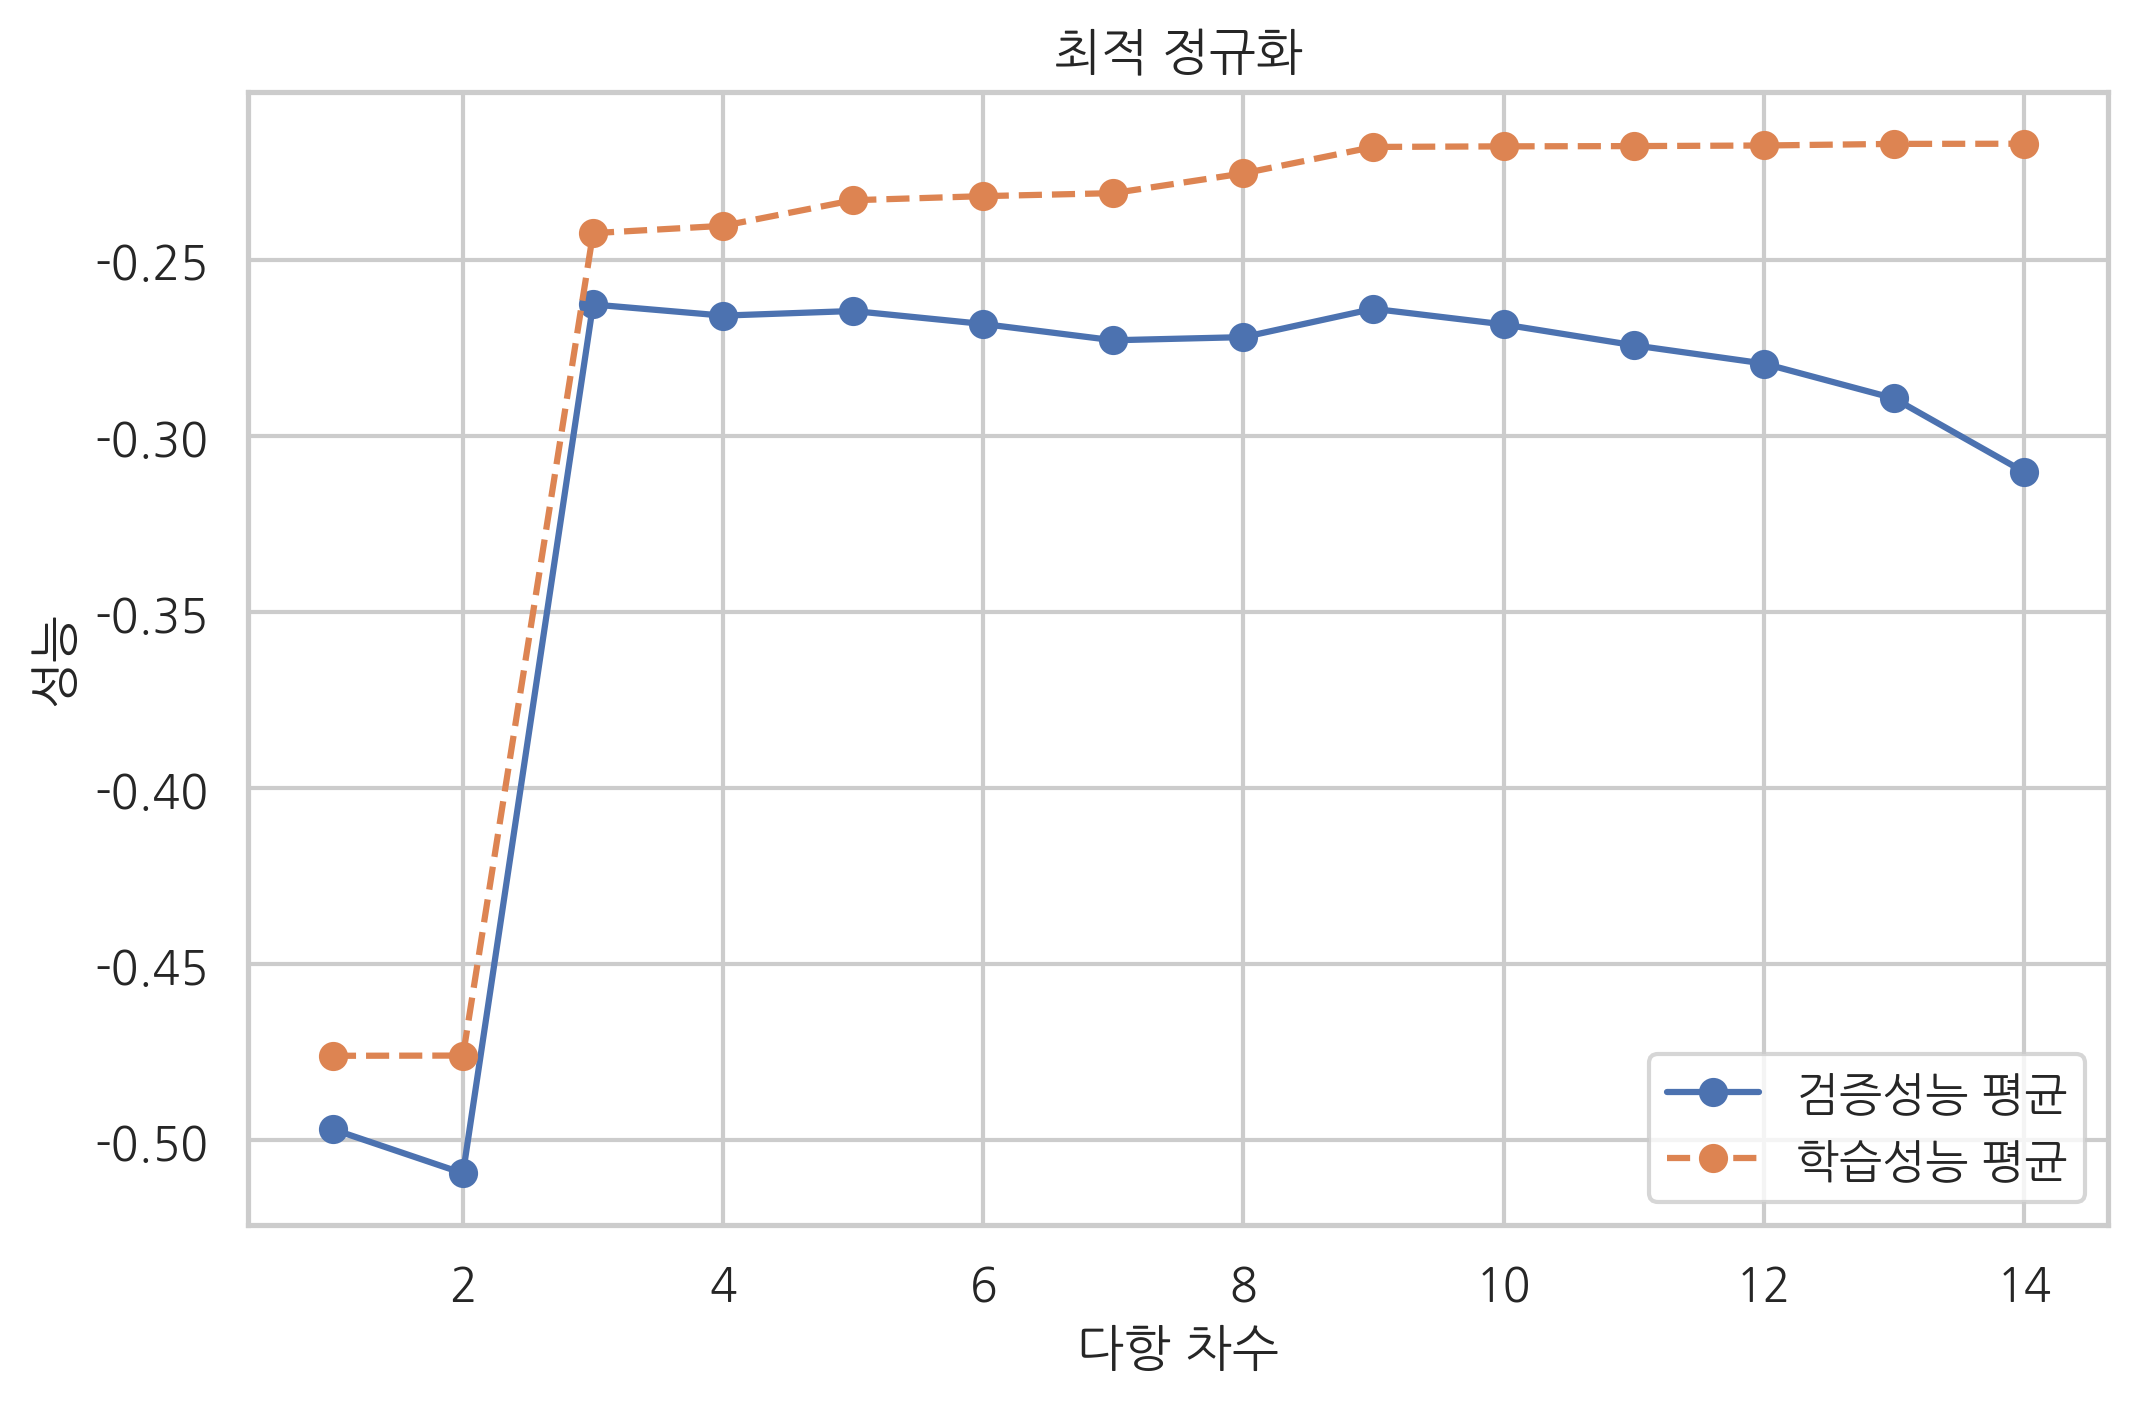

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

n_samples = 100
np.random.seed(0)
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.5
X = X[:, np.newaxis]


model = Pipeline([("poly", PolynomialFeatures()),
                  ("lreg", LinearRegression())])

degrees = np.arange(1, 15)
train_scores, test_scores = validation_curve(
    model, X, y, "poly__degree", degrees, cv=100,
    scoring="neg_mean_squared_error")

plt.plot(degrees, test_scores.mean(axis=1), "o-", label="검증성능 평균")
plt.plot(degrees, train_scores.mean(axis=1), "o--", label="학습성능 평균")
plt.ylabel('성능')
plt.xlabel('다항 차수')
plt.legend()
plt.title("최적 정규화")
plt.show()